In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from collections import Counter
import json
from sklearn.preprocessing import MinMaxScaler

# **Step counts:**

In [ ]:
import pandas as pd
from datetime import datetime

file_path = 'Step Count.csv'
data = pd.read_csv(file_path)

data = data.rename(columns={
    'Date/Time': 'date',
    'Step Count (count)': 'step_count'
})

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data['step_count'] = pd.to_numeric(data['step_count'], errors='coerce')

data['update_date'] = data['date'].dt.date

df_max_step = data.groupby('update_date')['step_count'].max().reset_index()

date_range = pd.date_range(start='2022-05-19', end='2024-01-15', freq='D')
df_all_dates = pd.DataFrame({'date': date_range})

df_max_step['update_date'] = pd.to_datetime(df_max_step['update_date'])
df_filled = pd.merge(df_all_dates, df_max_step, left_on='date', right_on='update_date', how='left')

df_filled['step_count'] = df_filled['step_count'].fillna(0)

df_filled = df_filled.drop(columns=['update_date'])

print("\nFilled DataFrame:")
print(df_filled[['date', 'step_count']])


Filled DataFrame:
          date  step_count
0   2022-05-19      3836.0
1   2022-05-20      1883.0
2   2022-05-21      1248.0
3   2022-05-22       390.0
4   2022-05-23     11177.0
..         ...         ...
602 2024-01-11      3825.0
603 2024-01-12      2973.0
604 2024-01-13       142.0
605 2024-01-14       707.0
606 2024-01-15      2500.0

[607 rows x 2 columns]


# **Instagram Activity based on likes:**

In [ ]:
import pandas as pd
from datetime import datetime
from collections import Counter

file_path = 'likes_data.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y %I:%M %p')

data['date'] = data['Date'].dt.strftime('%Y-%m-%d')

activity_types_of_interest = ['Comment', 'Post']
data_filtered = data[data['Type'].isin(activity_types_of_interest)]

date_occurrences = dict(Counter(data_filtered['date']))

df_activity = pd.DataFrame(list(date_occurrences.items()), columns=['date', 'activity_count'])

print(df_activity)

            date  activity_count
0     2024-10-19              13
1     2024-09-07               7
2     2024-09-01              14
3     2024-08-13              23
4     2024-06-22              13
...          ...             ...
1210  2021-07-04               4
1211  2021-07-03               1
1212  2021-07-01               1
1213  2021-06-30               4
1214  2021-06-29               1

[1215 rows x 2 columns]


In [45]:
import pandas as pd
from datetime import datetime
from collections import Counter

step_count_file_path = 'Step Count.csv'
activity_file_path = 'likes_data.csv'

step_data = pd.read_csv(step_count_file_path)
step_data = step_data.rename(columns={
    'Date/Time': 'date',
    'Step Count (count)': 'step_count'
})
step_data['date'] = pd.to_datetime(step_data['date'], format='%Y-%m-%d %H:%M:%S').dt.date
step_data = step_data.groupby('date', as_index=False)['step_count'].sum()

activity_data = pd.read_csv(activity_file_path)
activity_data['Date'] = pd.to_datetime(activity_data['Date'], format='%b %d, %Y %I:%M %p')
activity_data['date'] = activity_data['Date'].dt.date

categories_of_interest = ['Comment', 'Post']
activity_data_filtered = activity_data[activity_data['Type'].isin(categories_of_interest)]
activity_counts = activity_data_filtered.groupby('date', as_index=False).size()
activity_counts.rename(columns={'size': 'instagram_activity_count'}, inplace=True)

df_merged = pd.merge(step_data, activity_counts, on='date', how='outer')

df_merged['date'] = pd.to_datetime(df_merged['date'])

date_range_condition = (df_merged['date'] >= '2022-05-19') & (df_merged['date'] <= '2024-01-15')
df_filtered = df_merged[date_range_condition]

df_filtered = df_filtered.reset_index(drop=True)

print("The merged and filtered version of all available dates with information:")
print(df_filtered)

The merged and filtered version of all available dates with information:
          date  step_count  instagram_activity_count
0   2022-05-19      3836.0                       7.0
1   2022-05-20      1883.0                       5.0
2   2022-05-21      1248.0                       3.0
3   2022-05-22       390.0                       8.0
4   2022-05-23     11177.0                       4.0
..         ...         ...                       ...
602 2024-01-11      3825.0                       2.0
603 2024-01-12      2973.0                       4.0
604 2024-01-13       142.0                       4.0
605 2024-01-14       707.0                       4.0
606 2024-01-15      2500.0                       5.0

[607 rows x 3 columns]


# **Exploratory Data Analysis (EDA):**

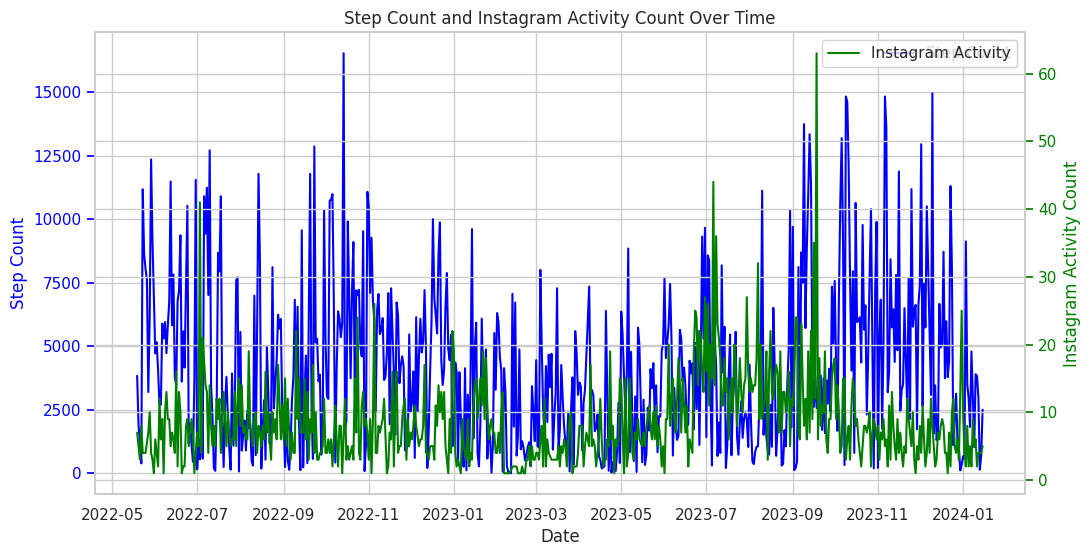

In [44]:
import pandas as pd
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

step_count_file_path = 'Step Count.csv'
activity_file_path = 'likes_data.csv'

step_data = pd.read_csv(step_count_file_path)
step_data = step_data.rename(columns={
    'Date/Time': 'date',
    'Step Count (count)': 'step_count'
})
step_data['date'] = pd.to_datetime(step_data['date'], format='%Y-%m-%d %H:%M:%S').dt.date
step_data = step_data.groupby('date', as_index=False)['step_count'].sum()

activity_data = pd.read_csv(activity_file_path)

activity_data['Date'] = pd.to_datetime(activity_data['Date'], format='%b %d, %Y %I:%M %p')
activity_data['date'] = activity_data['Date'].dt.date

categories_of_interest = ['Comment', 'Post']
activity_data_filtered = activity_data[activity_data['Type'].isin(categories_of_interest)]
activity_counts = activity_data_filtered.groupby('date', as_index=False).size()
activity_counts.rename(columns={'size': 'activity_count'}, inplace=True)

df_merged = pd.merge(step_data, activity_counts, on='date', how='outer')

df_merged['date'] = pd.to_datetime(df_merged['date'])

date_range_condition = (df_merged['date'] >= '2022-05-19') & (df_merged['date'] <= '2024-01-15')
df_filtered = df_merged[date_range_condition]

df_filtered = df_filtered.reset_index(drop=True)

df_filtered = df_filtered.sort_values(by='date')

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x='date', y='step_count', data=df_filtered, ax=ax1, label='Step Count', color='blue')
ax1.set_ylabel('Step Count', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
sns.lineplot(x='date', y='activity_count', data=df_filtered, ax=ax2, label='Instagram Activity', color='green')
ax2.set_ylabel('Instagram Activity Count', color='green')
ax2.tick_params('y', colors='green')

ax1.set_xlabel('Date')
plt.title('Step Count and Instagram Activity Count Over Time')

plt.show()

This time-series graph displays step count (blue) and Instagram activity count (green) over a specified time period. The step count exhibits considerable daily fluctuations, with occasional spikes exceeding 15,000 steps. Instagram activity remains relatively lower, with most values below 20 interactions but some noticeable peaks aligning with specific days. The visual comparison suggests no immediate, consistent correlation between higher physical activity and digital engagement, as both metrics appear to vary independently over time.

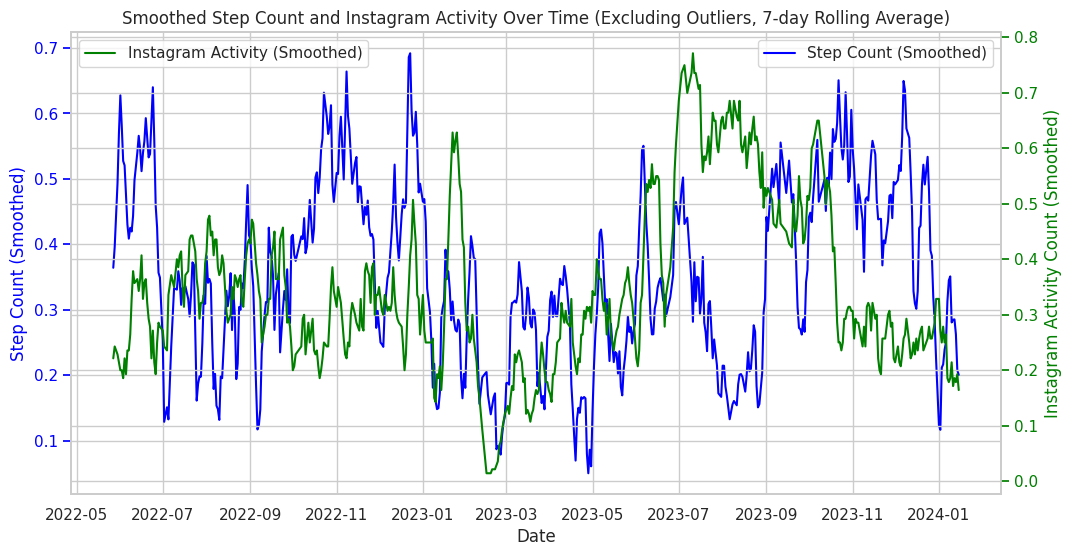

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from collections import Counter

step_count_file_path = 'Step Count.csv'
activity_file_path = 'likes_data.csv'

step_data = pd.read_csv(step_count_file_path)
step_data = step_data.rename(columns={
    'Date/Time': 'date',
    'Step Count (count)': 'step_count'
})
step_data['date'] = pd.to_datetime(step_data['date'], format='%Y-%m-%d %H:%M:%S').dt.date
step_data = step_data.groupby('date', as_index=False)['step_count'].sum()

activity_data = pd.read_csv(activity_file_path)

activity_data['Date'] = pd.to_datetime(activity_data['Date'], format='%b %d, %Y %I:%M %p')
activity_data['date'] = activity_data['Date'].dt.date

categories_of_interest = ['Comment', 'Post']
activity_data_filtered = activity_data[activity_data['Type'].isin(categories_of_interest)]
activity_counts = activity_data_filtered.groupby('date', as_index=False).size()
activity_counts.rename(columns={'size': 'activity_count'}, inplace=True)

df_merged = pd.merge(step_data, activity_counts, on='date', how='outer')

df_merged['date'] = pd.to_datetime(df_merged['date'])

date_range_condition = (df_merged['date'] >= '2022-05-19') & (df_merged['date'] <= '2024-01-15')
df_filtered = df_merged[date_range_condition]

df_filtered = df_filtered.reset_index(drop=True)

df_normalized = df_filtered.copy()

std_dev_threshold = 2

mean_step_count = df_normalized['step_count'].mean()
std_step_count = df_normalized['step_count'].std()
df_normalized = df_normalized[(df_normalized['step_count'] >= mean_step_count - std_dev_threshold * std_step_count) &
                              (df_normalized['step_count'] <= mean_step_count + std_dev_threshold * std_step_count)]

mean_activity_count = df_normalized['activity_count'].mean()
std_activity_count = df_normalized['activity_count'].std()
df_normalized = df_normalized[(df_normalized['activity_count'] >= mean_activity_count - std_dev_threshold * std_activity_count) &
                              (df_normalized['activity_count'] <= mean_activity_count + std_dev_threshold * std_activity_count)]

scaler = MinMaxScaler()
df_normalized[['step_count', 'activity_count']] = scaler.fit_transform(df_normalized[['step_count', 'activity_count']])

window_size = 7
df_normalized[['step_count', 'activity_count']] = df_normalized[['step_count', 'activity_count']].rolling(window=window_size).mean()

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x='date', y='step_count', data=df_normalized, ax=ax1, label='Step Count (Smoothed)', color='blue')
ax1.set_ylabel('Step Count (Smoothed)', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
sns.lineplot(x='date', y='activity_count', data=df_normalized, ax=ax2, label='Instagram Activity (Smoothed)', color='green')
ax2.set_ylabel('Instagram Activity Count (Smoothed)', color='green')
ax2.tick_params('y', colors='green')

ax1.set_xlabel('Date')
plt.title(f'Smoothed Step Count and Instagram Activity Over Time (Excluding Outliers, {window_size}-day Rolling Average)')

plt.legend(loc='upper left')
plt.show()

This graph shows the 7-day rolling averages of step counts (blue) and Instagram activity (green), providing a smoothed view of trends while excluding outliers. The smoothed step count reveals regular fluctuations over time, with notable peaks in mid-2023. Similarly, Instagram activity exhibits periodic increases, occasionally aligning with step count trends. However, there are also periods where one metric rises while the other decreases, suggesting a mixed relationship. The rolling averages offer a clearer view of overarching trends and temporal patterns compared to daily raw data.

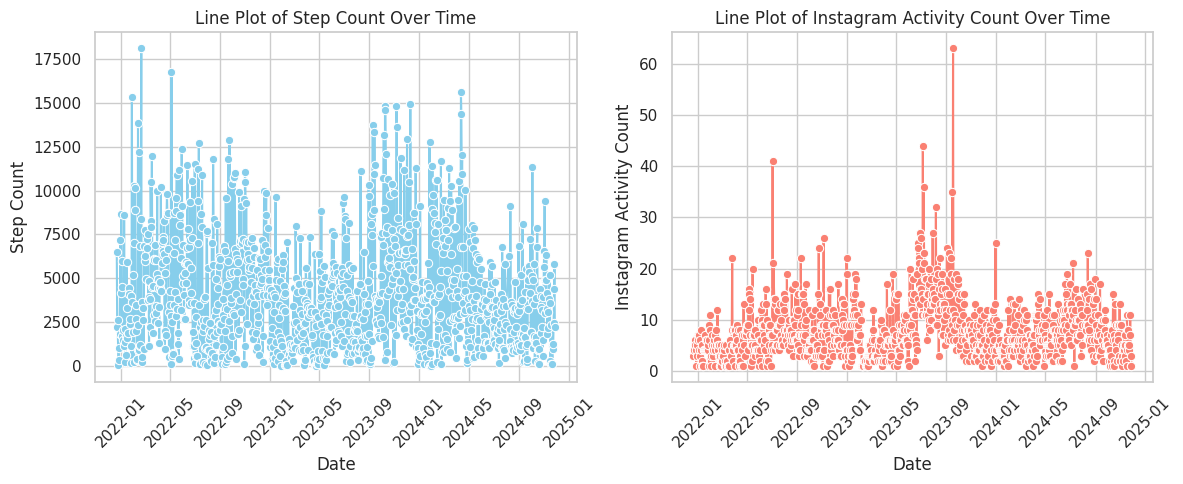

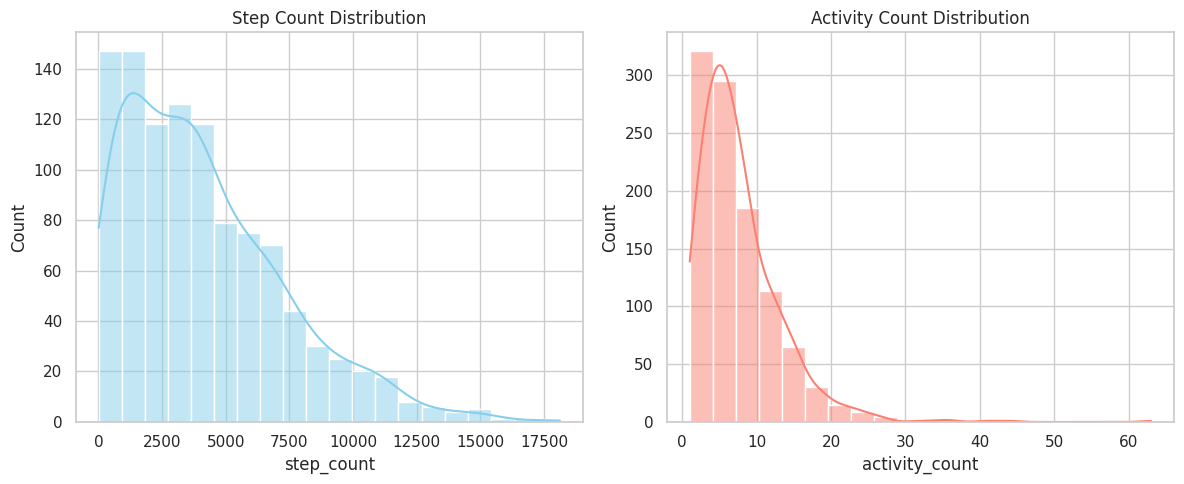

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
likes_daily_counts = likes_data.groupby('Date').size().reset_index(name='Activity Count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
df_merged = pd.merge(step_count_data, likes_daily_counts, on='Date', how='inner')

df_filtered = df_merged.rename(columns={
    'Step Count (count)': 'step_count',
    'Activity Count': 'activity_count',
    'Date': 'date'
})
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='date', y='step_count', data=df_filtered, marker='o', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Line Plot of Step Count Over Time')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(x='date', y='activity_count', data=df_filtered, marker='o', color='salmon')
plt.xlabel('Date')
plt.ylabel('Instagram Activity Count')
plt.title('Line Plot of Instagram Activity Count Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_filtered['step_count'], bins=20, kde=True, color='skyblue')
plt.title('Step Count Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_filtered['activity_count'], bins=20, kde=True, color='salmon')
plt.title('Activity Count Distribution')

plt.tight_layout()
plt.show()

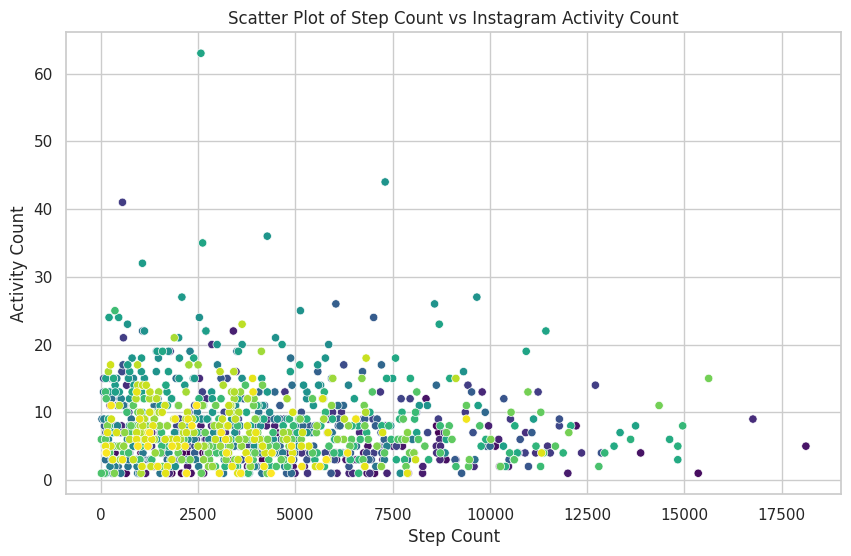

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
likes_daily_counts = likes_data.groupby('Date').size().reset_index(name='Activity Count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
df_merged = pd.merge(step_count_data, likes_daily_counts, on='Date', how='inner')

df_filtered = df_merged.rename(columns={
    'Step Count (count)': 'step_count',
    'Activity Count': 'activity_count',
    'Date': 'date'
})

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='step_count',
    y='activity_count',
    data=df_filtered,
    hue='date',
    palette='viridis',
    legend=False
)
plt.xlabel('Step Count')
plt.ylabel('Activity Count')
plt.title('Scatter Plot of Step Count vs Instagram Activity Count')
plt.show()

This scatter plot illustrates the relationship between daily step count and Instagram activity count. The majority of data points cluster at lower step and activity counts, with fewer instances of higher values for either metric. There is no clear linear correlation, suggesting minimal or no direct relationship between physical activity levels and Instagram engagement. The scattered nature of points reflects variability in both behaviors.

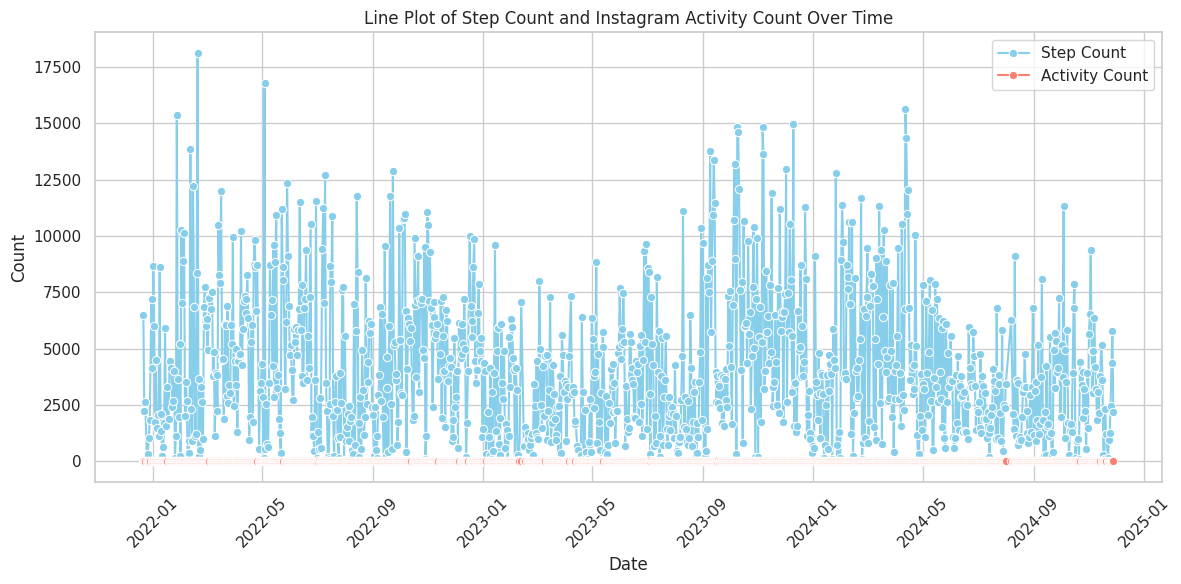

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
likes_daily_counts = likes_data.groupby('Date').size().reset_index(name='Activity Count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
df_merged = pd.merge(step_count_data, likes_daily_counts, on='Date', how='inner')

df_filtered = df_merged.rename(columns={
    'Step Count (count)': 'step_count',
    'Activity Count': 'activity_count',
    'Date': 'date'
})
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='step_count', data=df_filtered, label='Step Count', marker='o', color='skyblue')
sns.lineplot(x='date', y='activity_count', data=df_filtered, label='Activity Count', marker='o', color='salmon')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Line Plot of Step Count and Instagram Activity Count Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


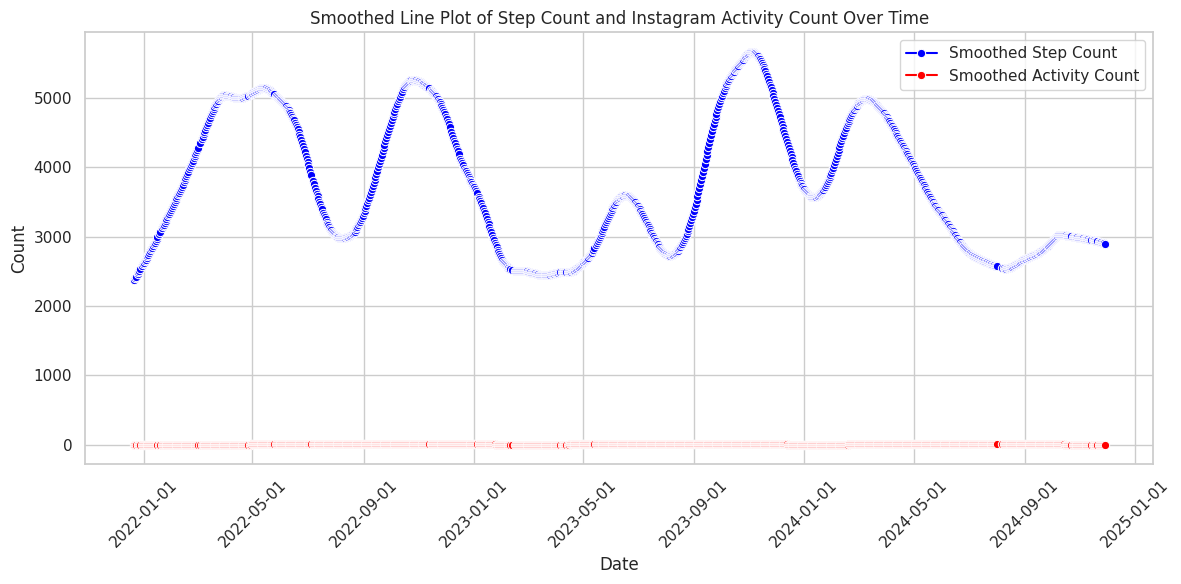

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates
import pandas as pd

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
likes_daily_counts = likes_data.groupby('Date').size().reset_index(name='Activity Count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
df_merged = pd.merge(step_count_data, likes_daily_counts, on='Date', how='inner')

df_filtered = df_merged.rename(columns={
    'Step Count (count)': 'step_count',
    'Activity Count': 'activity_count',
    'Date': 'date'
})

lowess_step_count = sm.nonparametric.lowess(df_filtered['step_count'], pd.to_datetime(df_filtered['date']), frac=0.1)
lowess_activity_count = sm.nonparametric.lowess(df_filtered['activity_count'], pd.to_datetime(df_filtered['date']), frac=0.1)

df_smoothed_step_count = pd.DataFrame(lowess_step_count, columns=['date', 'smoothed_step_count'])
df_smoothed_activity_count = pd.DataFrame(lowess_activity_count, columns=['date', 'smoothed_activity_count'])

df_smoothed_step_count['date'] = pd.to_datetime(df_smoothed_step_count['date'])
df_smoothed_activity_count['date'] = pd.to_datetime(df_smoothed_activity_count['date'])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='date',
    y='smoothed_step_count',
    data=df_smoothed_step_count,
    label='Smoothed Step Count',
    marker='o',
    color='blue'
)
sns.lineplot(
    x='date',
    y='smoothed_activity_count',
    data=df_smoothed_activity_count,
    label='Smoothed Activity Count',
    marker='o',
    color='red'
)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Smoothed Line Plot of Step Count and Instagram Activity Count Over Time')
plt.legend()
plt.tight_layout()
plt.show()

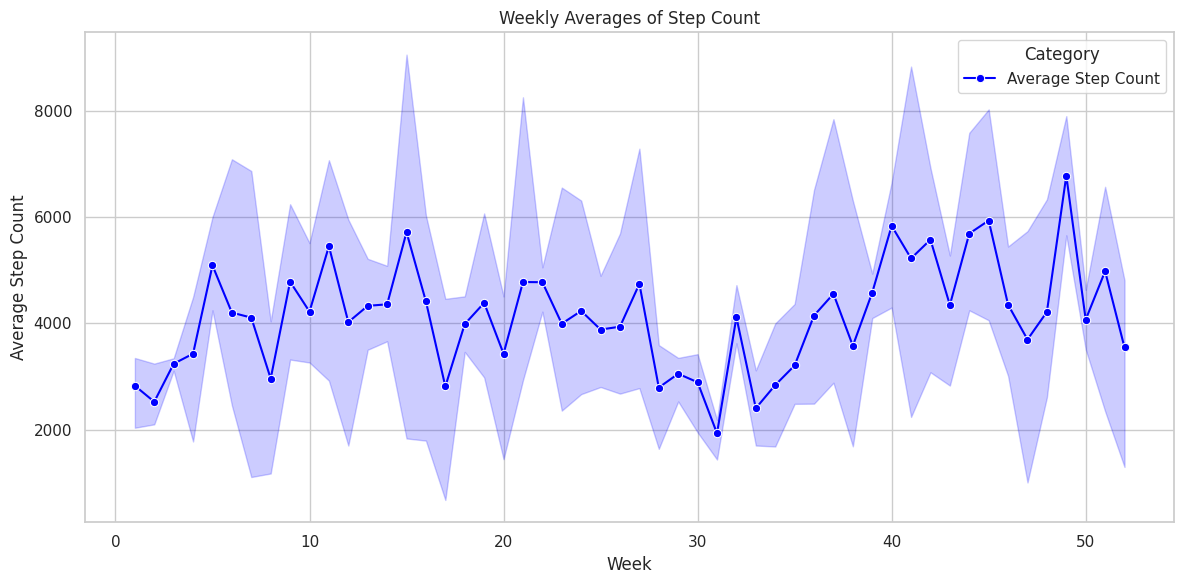

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
likes_daily_counts = likes_data.groupby('Date').size().reset_index(name='Activity Count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
df_merged = pd.merge(step_count_data, likes_daily_counts, on='Date', how='inner')

df_filtered = df_merged.rename(columns={
    'Step Count (count)': 'step_count',
    'Activity Count': 'activity_count',
    'Date': 'date'
})

df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['week'] = df_filtered['date'].dt.isocalendar().week
df_filtered['year'] = df_filtered['date'].dt.isocalendar().year

df_weekly_avg = df_filtered.groupby(['year', 'week']).agg({
    'step_count': 'mean'
}).reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='step_count', data=df_weekly_avg, label='Average Step Count', marker='o', color='blue')

plt.xlabel('Week')
plt.ylabel('Average Step Count')
plt.title('Weekly Averages of Step Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

This line chart displays the weekly average step count over the year, with the shaded area representing the variability in step counts across weeks. The step count shows fluctuations, with some weeks experiencing significantly higher or lower activity levels. Peaks in activity suggest increased movement during specific periods, possibly linked to events or seasonal influences, while troughs indicate lower activity phases. The overall trend highlights weekly variations in physical activity patterns.

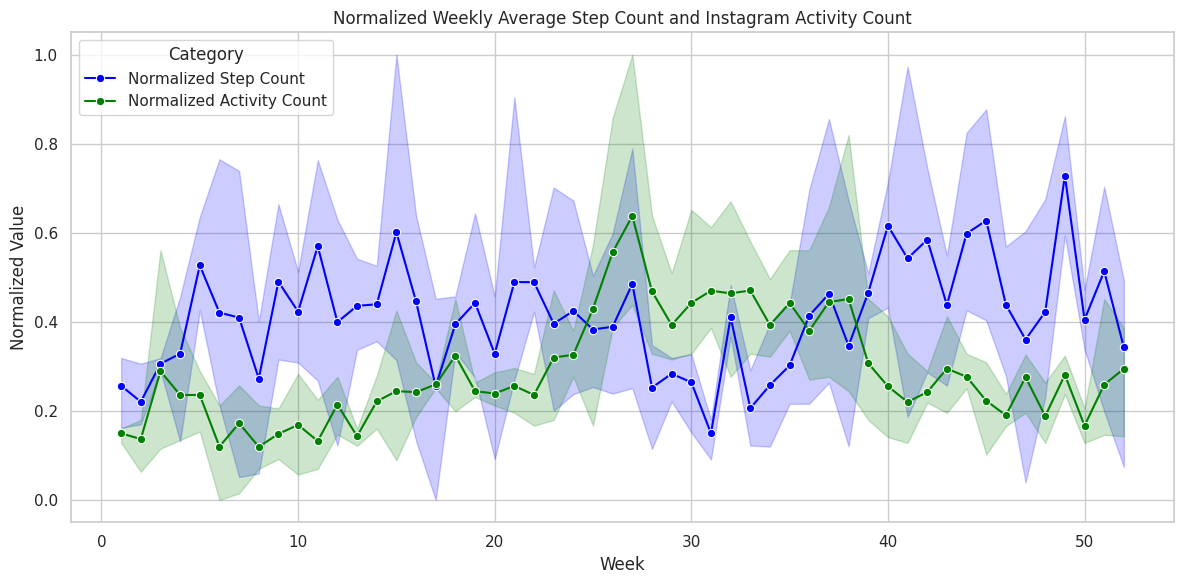

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
likes_daily_counts = likes_data.groupby('Date').size().reset_index(name='Activity Count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
df_merged = pd.merge(step_count_data, likes_daily_counts, on='Date', how='inner')

df_filtered = df_merged.rename(columns={
    'Step Count (count)': 'step_count',
    'Activity Count': 'activity_count',
    'Date': 'date'
})

df_filtered['date'] = pd.to_datetime(df_filtered['date'])

df_filtered['week'] = df_filtered['date'].dt.isocalendar().week
df_filtered['year'] = df_filtered['date'].dt.isocalendar().year

df_weekly_avg = df_filtered.groupby(['year', 'week']).agg({
    'step_count': 'mean',
    'activity_count': 'mean'
}).reset_index()

df_weekly_avg['step_count_normalized'] = (df_weekly_avg['step_count'] - df_weekly_avg['step_count'].min()) / (
        df_weekly_avg['step_count'].max() - df_weekly_avg['step_count'].min())

df_weekly_avg['activity_count_normalized'] = (df_weekly_avg['activity_count'] - df_weekly_avg['activity_count'].min()) / (
        df_weekly_avg['activity_count'].max() - df_weekly_avg['activity_count'].min())

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='week',
    y='step_count_normalized',
    data=df_weekly_avg,
    label='Normalized Step Count',
    marker='o',
    color='blue'
)
sns.lineplot(
    x='week',
    y='activity_count_normalized',
    data=df_weekly_avg,
    label='Normalized Activity Count',
    marker='o',
    color='green'
)
plt.xlabel('Week')
plt.ylabel('Normalized Value')
plt.title('Normalized Weekly Average Step Count and Instagram Activity Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

This line chart displays the normalized weekly averages of step count (blue) and Instagram activity count (green), with shaded areas representing variability across weeks. The step count shows more pronounced fluctuations, with consistent peaks and troughs over time, whereas Instagram activity is relatively steadier but gradually aligns with step count patterns in later weeks. The overlap in shaded areas suggests moments of correlation between physical activity and social engagement. This visualization highlights how these metrics vary weekly and occasionally mirror each other’s trends.

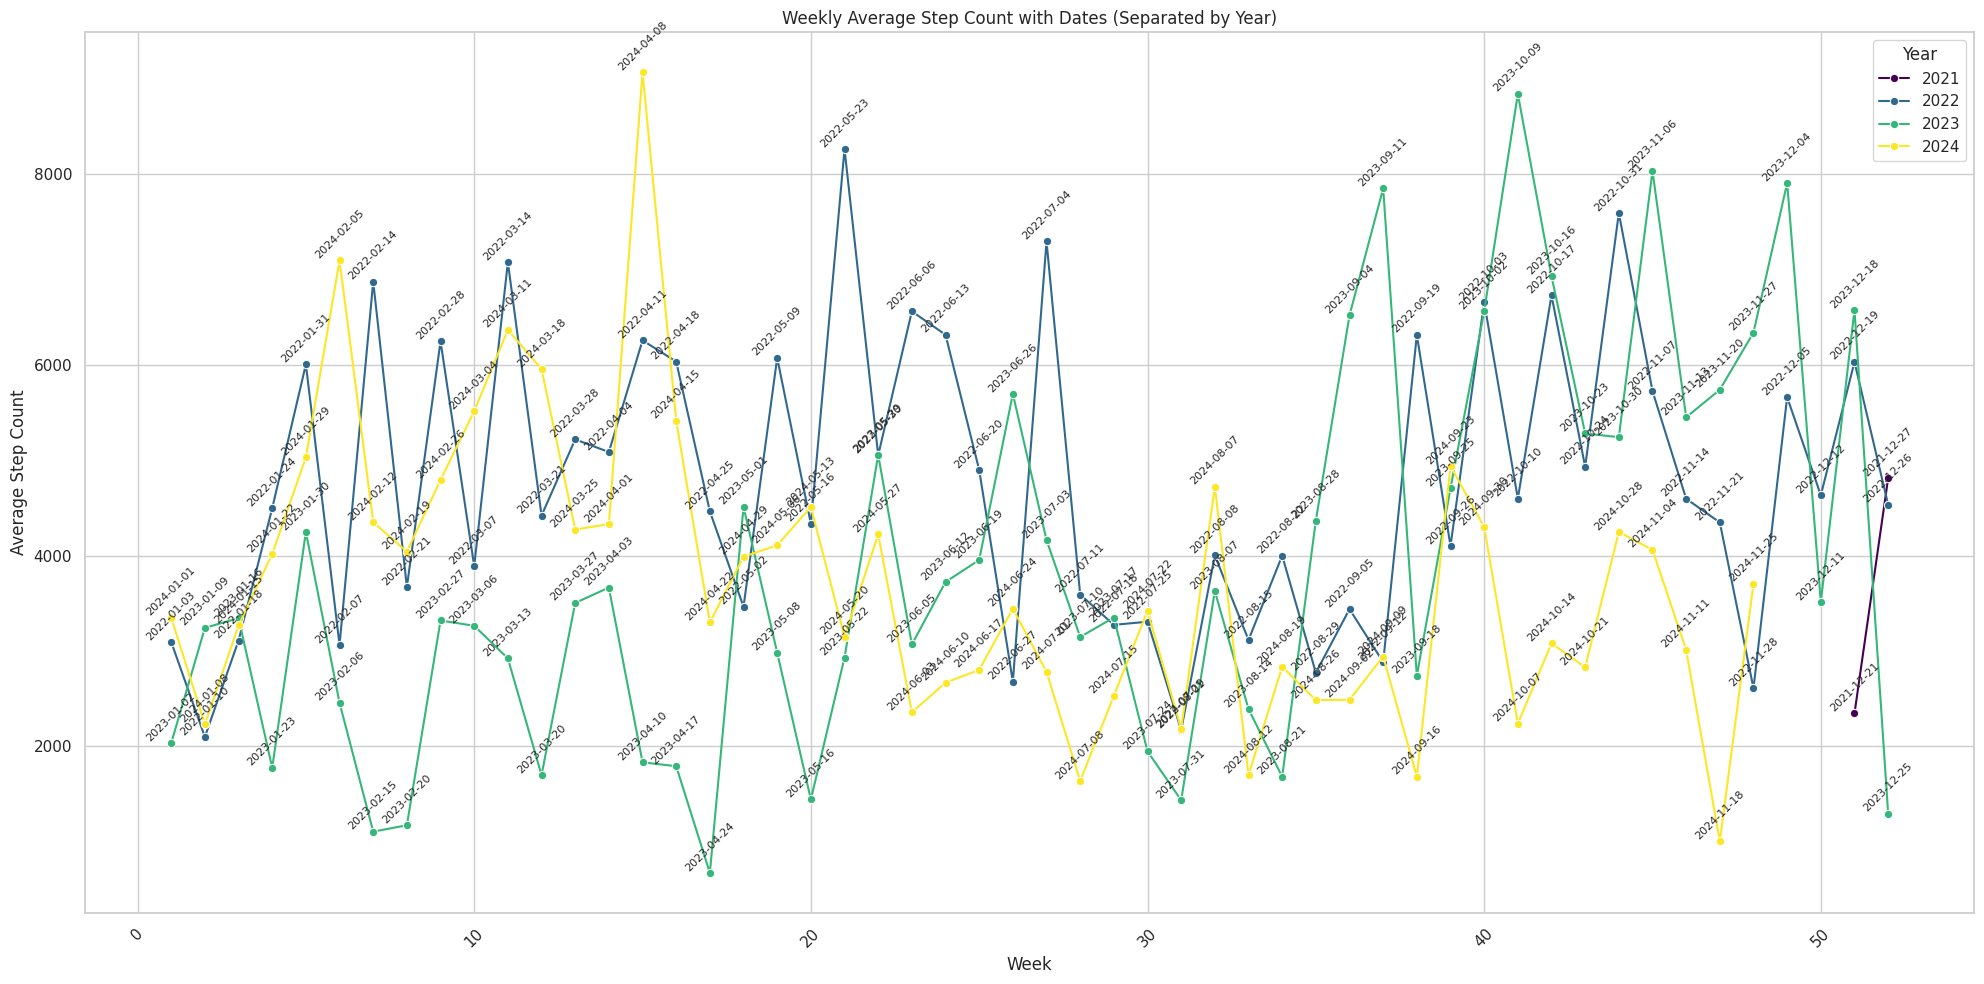

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['week'] = df_filtered['date'].dt.isocalendar().week
df_filtered['year'] = df_filtered['date'].dt.isocalendar().year

df_weekly_avg = df_filtered.groupby(['year', 'week']).agg({
    'step_count': 'mean',
    'date': 'first'
}).reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(20, 10))
sns.lineplot(x='week', y='step_count', data=df_weekly_avg, hue='year', palette='viridis', marker='o')

for i, row in df_weekly_avg.iterrows():
    plt.text(row['week'], row['step_count'], f"{row['date'].strftime('%Y-%m-%d')}",
             ha='center', va='bottom', rotation=45, fontsize=8)

plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Average Step Count')
plt.title('Weekly Average Step Count with Dates (Separated by Year)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

This detailed line chart shows the weekly average step counts across the years 2021 to 2024, annotated with specific week start dates. The chart highlights significant weekly variations, with noticeable peaks and troughs corresponding to specific dates. 2023 (green) consistently shows higher step counts compared to other years, suggesting increased physical activity, while 2024 (yellow) reflects initial high variability followed by a decline in later weeks. These trends underline the seasonal and yearly fluctuations in step counts, with certain weeks standing out due to higher physical activity levels, possibly tied to events or external factors.

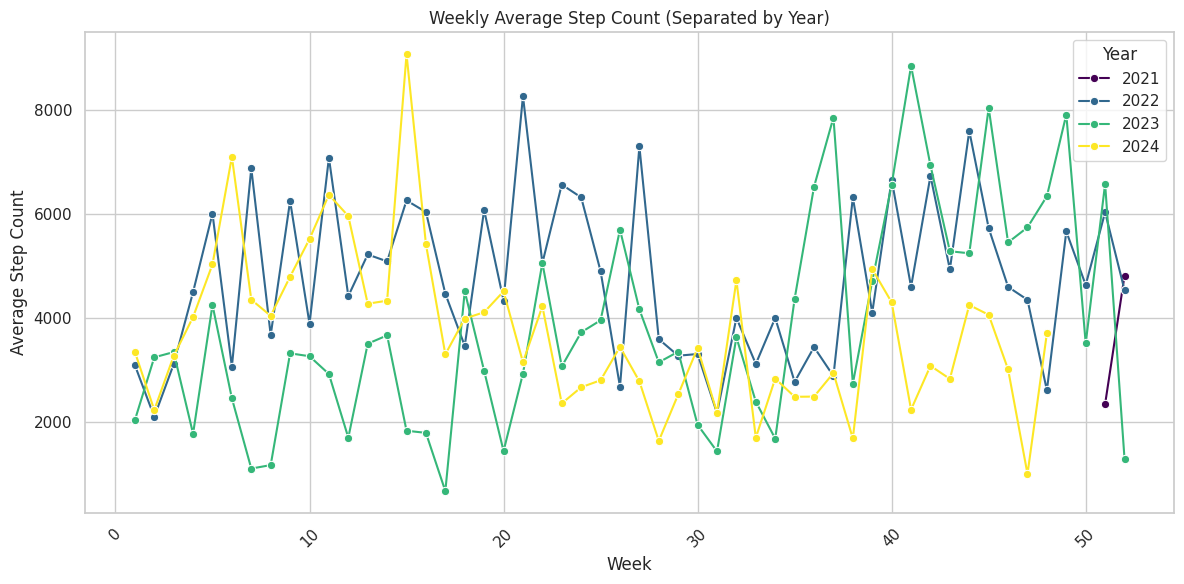

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered['date'] = pd.to_datetime(df_filtered['date'])

df_filtered['week'] = df_filtered['date'].dt.isocalendar().week
df_filtered['year'] = df_filtered['date'].dt.isocalendar().year

df_weekly_avg = df_filtered.groupby(['year', 'week']).agg({
    'step_count': 'mean',
    'date': 'first'
}).reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='step_count', data=df_weekly_avg, hue='year', palette='viridis', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Average Step Count')
plt.title('Weekly Average Step Count (Separated by Year)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

This line chart illustrates weekly average step counts across the years 2021 to 2024, revealing year-to-year and seasonal variations. Peaks and troughs are evident, suggesting fluctuations in physical activity due to weekly behavioral patterns or external factors. Notably, 2023 (green) shows consistently higher peaks, indicating increased activity compared to other years. The data for 2024 (yellow) begins with higher variability but reflects a decline toward the end of the observed weeks, possibly influenced by seasonal conditions. The chart highlights weekly patterns and differences in physical activity levels across the years.

                step_count  activity_count
step_count        1.000000       -0.082727
activity_count   -0.082727        1.000000


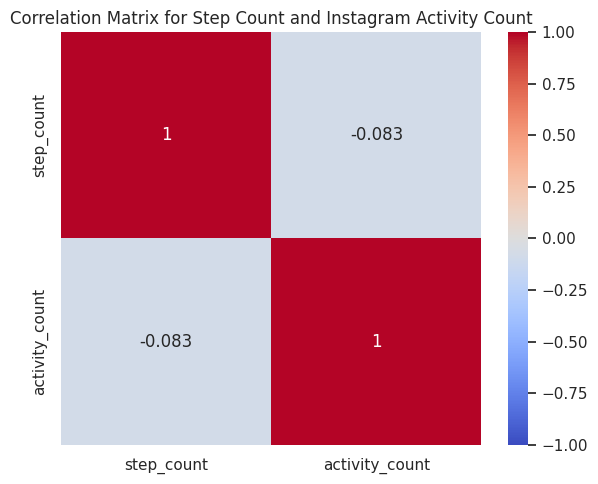

In [58]:
df_filtered = df_merged.rename(columns={
    'Step Count (count)': 'step_count',
    'Activity Count': 'activity_count',
    'Date': 'date'
})

correlation_matrix = df_filtered[['step_count', 'activity_count']].corr()

print(correlation_matrix)

sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Step Count and Instagram Activity Count')
plt.tight_layout()
plt.show()

In [59]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date/Time       1043 non-null   datetime64[ns]
 1   step_count      1043 non-null   float64       
 2   date            1043 non-null   object        
 3   activity_count  1043 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.7+ KB


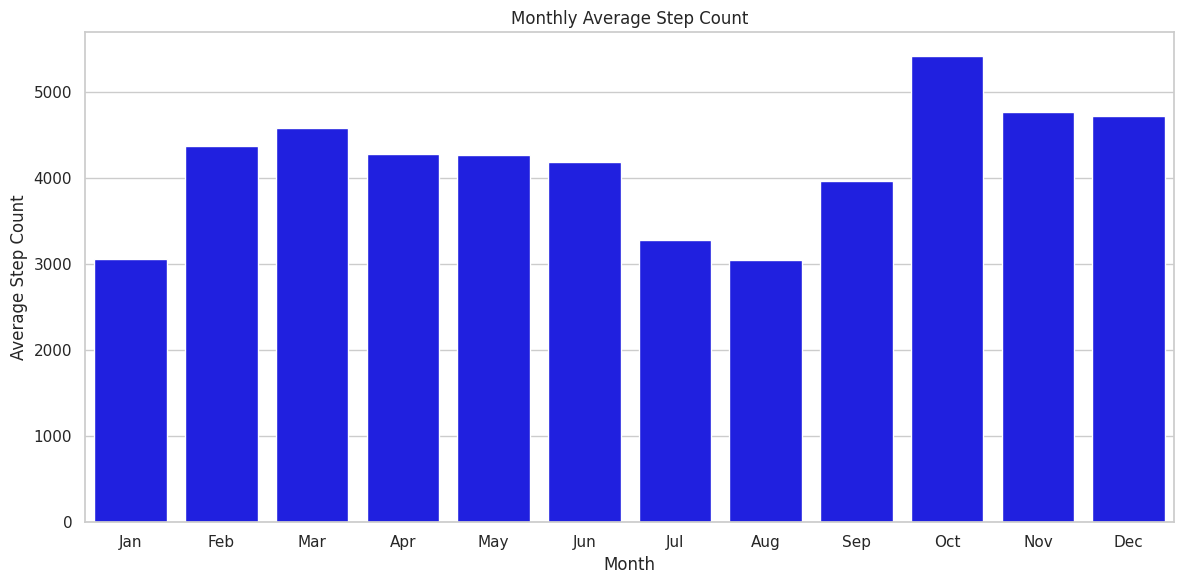

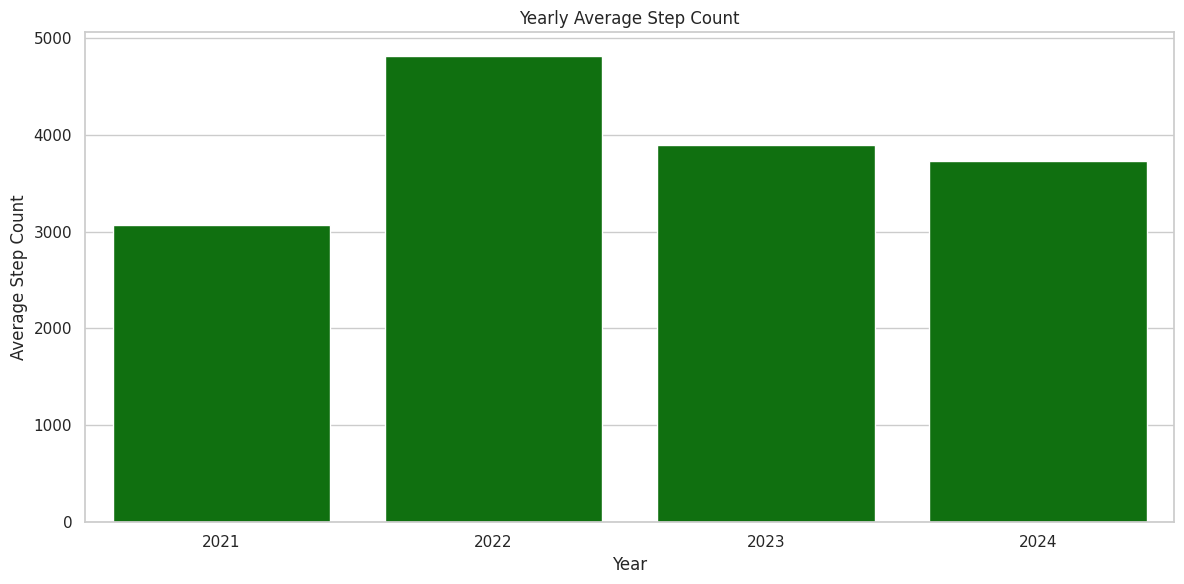

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
step_count_data['month'] = step_count_data['Date/Time'].dt.month
step_count_data['year'] = step_count_data['Date/Time'].dt.year

monthly_avg = step_count_data.groupby('month')['Step Count (count)'].mean()
yearly_avg = step_count_data.groupby('year')['Step Count (count)'].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color='blue')
plt.xlabel('Month')
plt.ylabel('Average Step Count')
plt.title('Monthly Average Step Count')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, color='green')
plt.xlabel('Year')
plt.ylabel('Average Step Count')
plt.title('Yearly Average Step Count')
plt.tight_layout()
plt.show()

The monthly and yearly average step count charts provide insights into seasonal and annual activity trends. The monthly chart shows October as the peak month for step counts, indicating heightened activity, while January has the lowest average, likely due to colder weather. Activity remains steady from March to June, dips in July and August, and rises again in September, reflecting seasonal patterns. On a yearly scale, step counts significantly increased in 2022, reaching the highest average, while 2021 recorded the lowest, indicating overall lower activity. Both 2023 and 2024 show similar activity levels, slightly below 2022, suggesting increased activity during 2022 due to potential lifestyle or external factors. Together, these charts highlight both seasonal and yearly influences on physical activity.

[<class 'float'>]
   Date/Time  step_count       date  activity_count  month month_name
0 2021-12-21      6481.0 2021-12-21               3     12        Dec
1 2021-12-22      2224.0 2021-12-22               4     12        Dec
2 2021-12-23      2620.0 2021-12-23               4     12        Dec
3 2021-12-25        73.0 2021-12-25               6     12        Dec
4 2021-12-26       325.0 2021-12-26               5     12        Dec


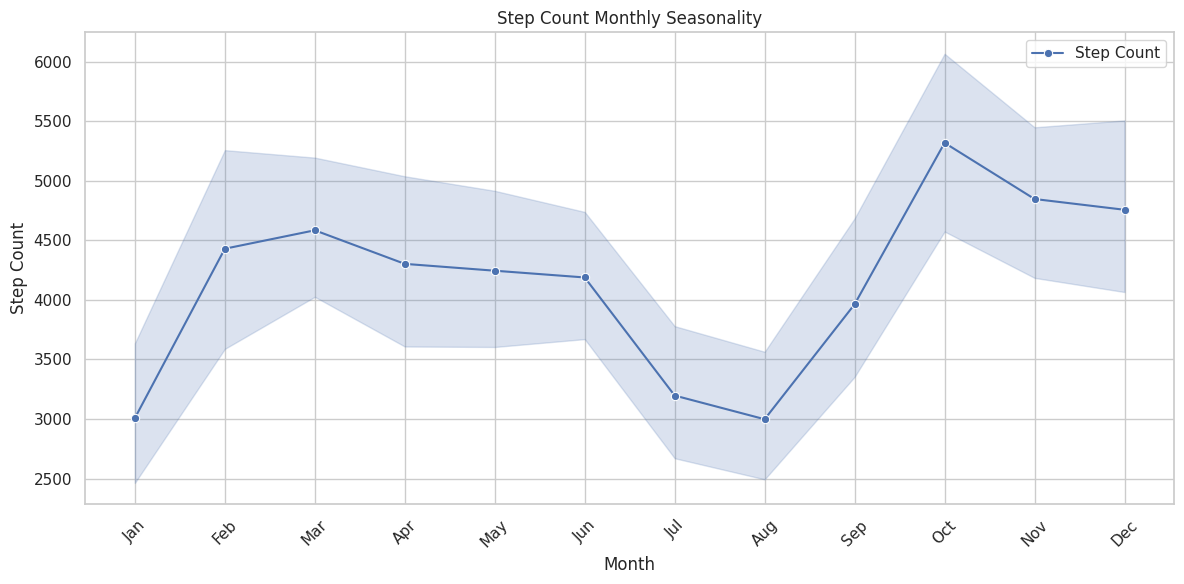

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered['date'] = pd.to_datetime(df_filtered['date'])

df_filtered['month'] = df_filtered['date'].dt.month
df_filtered['month_name'] = df_filtered['date'].dt.strftime('%b')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_filtered['month_name'] = pd.Categorical(df_filtered['month_name'], categories=month_order, ordered=True)

print(df_filtered['step_count'].apply(type).unique())
print(df_filtered.head())

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='month_name',
    y='step_count',
    data=df_filtered,
    label='Step Count',
    marker='o'
)
plt.xlabel('Month')
plt.ylabel('Step Count')
plt.title('Step Count Monthly Seasonality')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The graph shows monthly seasonality in step counts, with activity peaking in spring (March to May) and autumn (September to October). A notable dip occurs during the summer months (July and August), possibly due to vacations or weather conditions. Winter months (January and December) display lower activity, aligning with colder temperatures. The shaded area represents variability, highlighting consistent seasonal trends across the year.

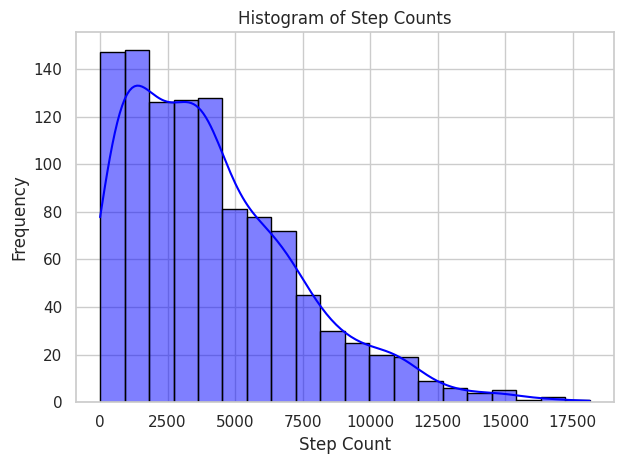

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

if 'Step Count (count)' in step_count_data.columns:
    step_count_values = step_count_data['Step Count (count)']

sns.set(style="whitegrid")
sns.histplot(step_count_values, bins=20, kde=True, color='blue', edgecolor='black')

plt.xlabel('Step Count')
plt.ylabel('Frequency')
plt.title('Histogram of Step Counts')
plt.tight_layout()
plt.show()

The histogram shows a right-skewed distribution of daily step counts, with most days having lower activity levels (0–2500 steps). The frequency decreases as step counts increase, with fewer days exceeding 7500 steps, highlighting a general trend of low physical activity.

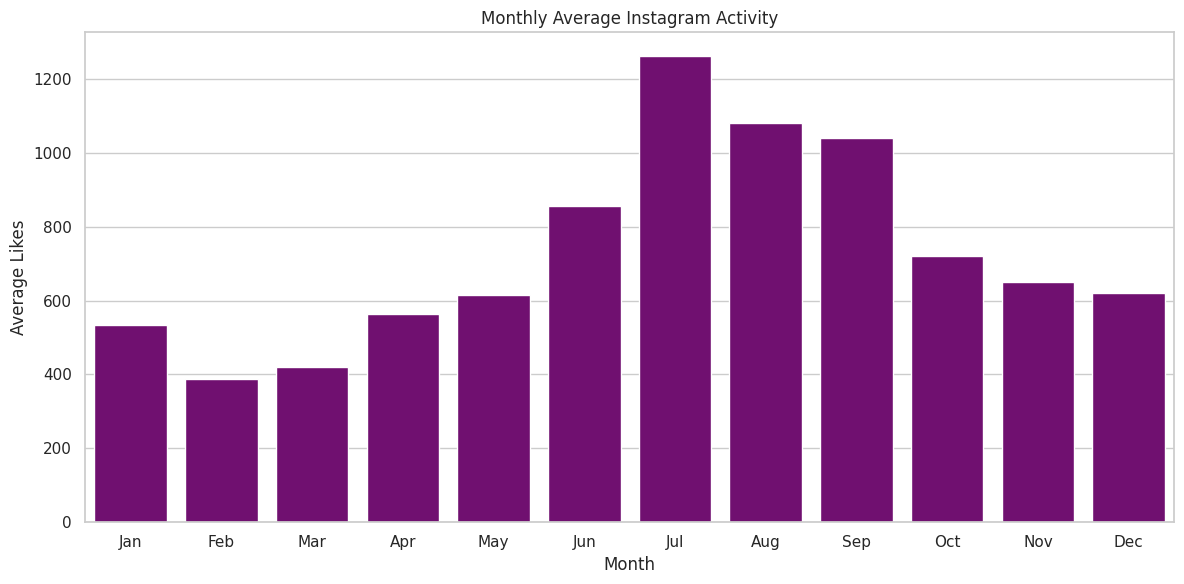

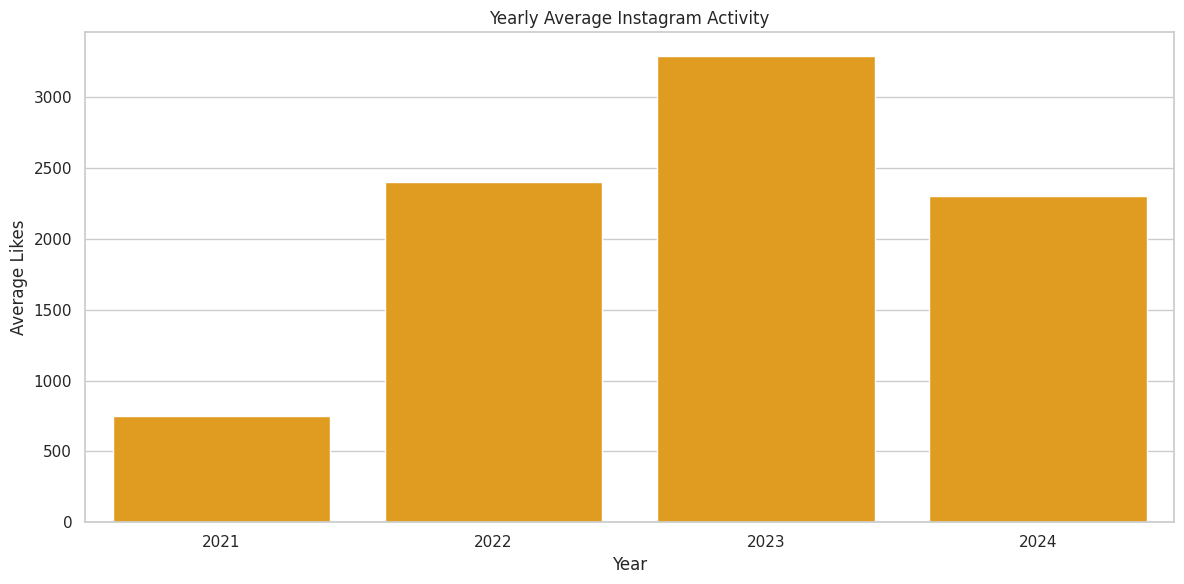

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

likes_data = pd.read_csv('likes_data.csv')

likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['month'] = likes_data['Date'].dt.month
likes_data['year'] = likes_data['Date'].dt.year

monthly_avg_likes = likes_data.groupby('month').size()
yearly_avg_likes = likes_data.groupby('year').size()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_likes.index, y=monthly_avg_likes.values, color='purple')
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.title('Monthly Average Instagram Activity')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_avg_likes.index, y=yearly_avg_likes.values, color='orange')
plt.xlabel('Year')
plt.ylabel('Average Likes')
plt.title('Yearly Average Instagram Activity')
plt.tight_layout()
plt.show()

This bar chart displays the yearly average Instagram activity (likes) across four years:

- **2021** shows the lowest average engagement, indicating minimal activity during that year.  
- **2022** and **2023** display significant increases, with **2023** achieving the highest average likes, suggesting a peak in Instagram engagement.  
- **2024** demonstrates a decline from 2023 but maintains a higher engagement level than 2021 and 2022.  

The chart highlights a growth trend in activity, peaking in 2023, followed by a slight decrease in 2024.

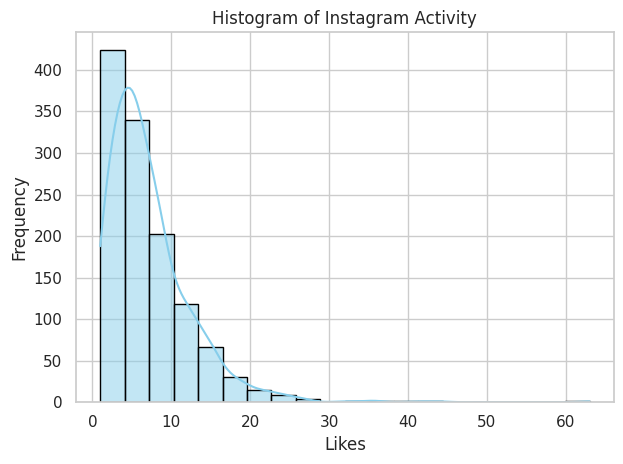

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

likes_data = pd.read_csv('likes_data.csv')

likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

likes_values = daily_likes['likes']

sns.set(style="whitegrid")
sns.histplot(likes_values, bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Histogram of Instagram Activity')
plt.tight_layout()
plt.show()

This histogram illustrates the distribution of Instagram likes, showcasing how frequently different levels of activity occur:

- **Skewness:** The distribution is heavily right-skewed, with the majority of Instagram posts receiving fewer likes, typically between 0 and 10.  
- **Frequency Decline:** As the number of likes increases, the frequency decreases sharply, indicating that higher engagement levels are less common.  
- **Peak Activity:** The highest frequency is observed for posts with very low likes, reflecting typical user engagement behavior.  

The data suggests that most posts attract modest levels of activity, while very high engagement is rare.

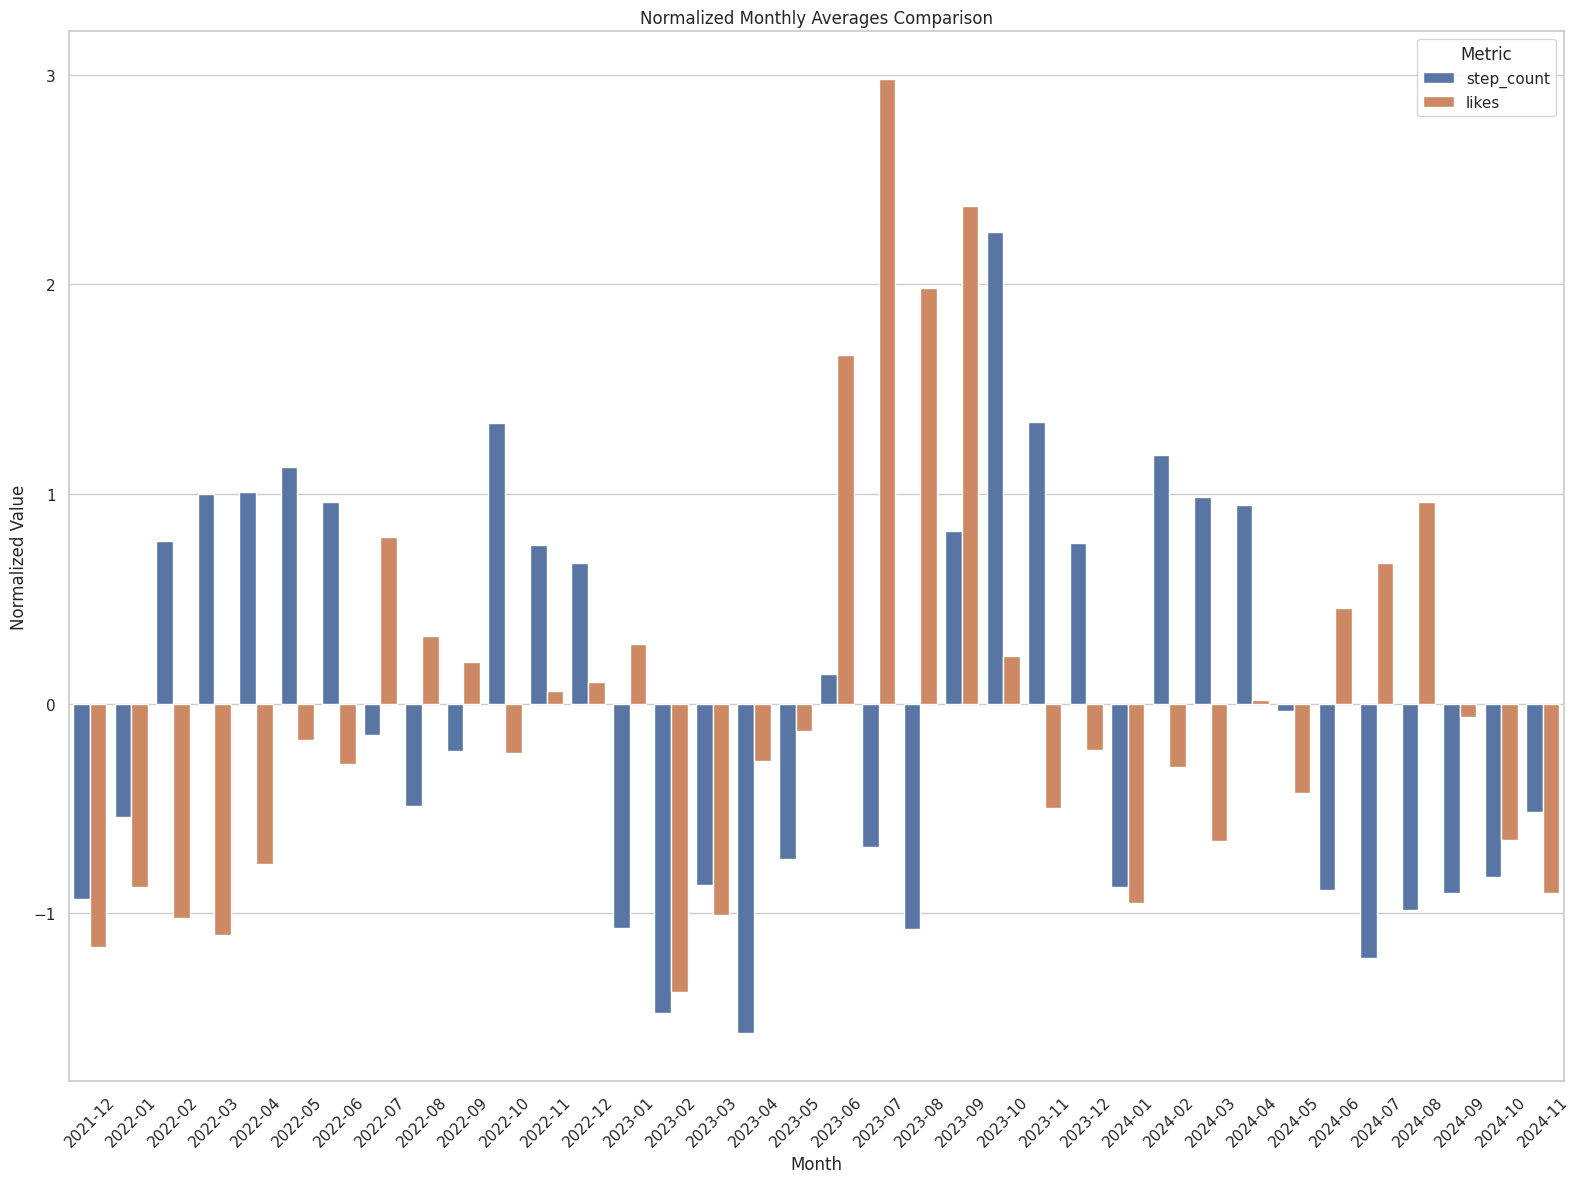

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered['month'] = df_filtered['Date/Time'].dt.to_period('M')
df_monthly_avg = df_filtered.groupby('month').agg({
    'Step Count (count)': 'mean',
    'likes': 'mean'
}).reset_index()

df_monthly_avg.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

def zscore_normalize(series):
    return (series - series.mean()) / series.std()

df_monthly_avg_normalized = df_monthly_avg.copy()
df_monthly_avg_normalized[['step_count', 'likes']] = df_monthly_avg_normalized[['step_count', 'likes']].apply(zscore_normalize)

df_monthly_avg_normalized_melted = pd.melt(df_monthly_avg_normalized, id_vars='month', var_name='Metric', value_name='Normalized Value')

sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))
sns.barplot(x='month', y='Normalized Value', hue='Metric', data=df_monthly_avg_normalized_melted)
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.title('Normalized Monthly Averages Comparison')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

This graph presents a comparison of normalized monthly averages for step counts (blue bars) and Instagram likes (orange bars) over time:

- **Peaks and Valleys:** Distinct peaks and valleys are visible, indicating fluctuations in both physical activity and social media engagement across months.  
- **Opposing Trends:** Some months show inverse patterns where high step counts coincide with lower Instagram likes and vice versa, suggesting possible trade-offs between physical activity and social media use.  
- **Seasonal Variation:** Activity patterns vary seasonally, with summer months (e.g., July 2023) often exhibiting higher step counts, while likes exhibit less consistent trends.  

The visualization highlights the interplay between step counts and Instagram engagement, reflecting behavioral and seasonal influences.

In [66]:
df_monthly_avg

month   step_count      likes
0   2021-12  2879.333333   3.888889
1   2022-01  3389.310345   4.793103
2   2022-02  5110.627143   4.321429
3   2022-03  5402.379310   4.068966
4   2022-04  5413.704828   5.137931
5   2022-05  5568.266667   7.000000
6   2022-06  5351.200000   6.633333
7   2022-07  3900.000000  10.033333
8   2022-08  3457.451613   8.548387
9   2022-09  3800.200000   8.166667
10  2022-10  5844.133333   6.800000
11  2022-11  5084.517241   7.724138
12  2022-12  4972.655172   7.862069
13  2023-01  2698.400000   8.433333
14  2023-02  2165.625000   3.208333
15  2023-03  2966.324000   4.366667
16  2023-04  2042.990714   6.678571
17  2023-05  3124.966667   7.133333
18  2023-06  4279.233333  12.766667
19  2023-07  3202.677419  16.903226
20  2023-08  2691.322581  13.774194
21  2023-09  5173.925000  15.000000
22  2023-10  7034.064516   8.258065
23  2023-11  5853.033333   5.966667
24  2023-12  5098.215484   6.838710
25  2024-01  2950.881290   4.548387
26  2024-02  5644.709655   6.586207
27  2024-03  5383.580645   5.483871
28  2024-04  5336.366667   7.600000
29  2024-05  4047.677419   6.193548
30  2024-06  2933.966667   8.966667
31  2024-07  2512.121613   9.645161
32  2024-08  2810.628400  10.560000
33  2024-09  2915.633333   7.333333
34  2024-10  3016.933333   5.500000
35  2024-11  3419.115385   4.692308

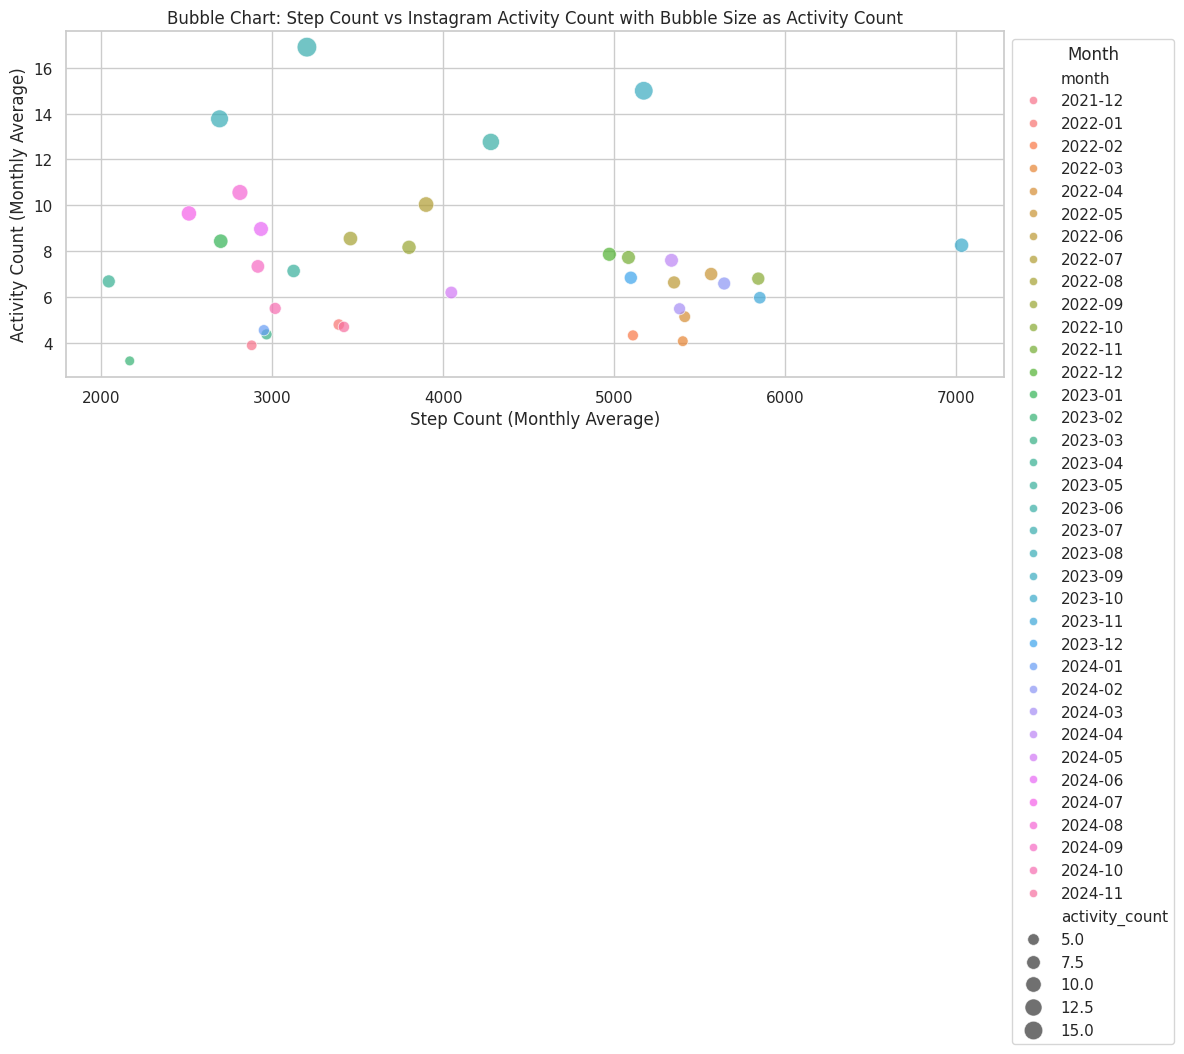

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='activity_count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered['month'] = df_filtered['Date/Time'].dt.to_period('M')
df_monthly_avg = df_filtered.groupby('month').agg({
    'Step Count (count)': 'mean',
    'activity_count': 'mean'
}).reset_index()

df_monthly_avg.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='step_count',
    y='activity_count',
    size='activity_count',
    hue='month',
    data=df_monthly_avg,
    sizes=(50, 200),
    alpha=0.7
)
plt.xlabel('Step Count (Monthly Average)')
plt.ylabel('Activity Count (Monthly Average)')
plt.title('Bubble Chart: Step Count vs Instagram Activity Count with Bubble Size as Activity Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


This bubble chart visualizes the relationship between monthly average step count and Instagram activity count, with bubble sizes representing the activity count magnitude:

- **Higher step counts (above 5000)** are associated with moderate Instagram activity levels, suggesting balanced engagement between physical activity and social media.  
- **Lower step counts (below 3000)** correlate with varying Instagram activity levels, reflecting diverse user behavior patterns during less active months.  
- Larger bubbles, indicating higher Instagram activity, are scattered across different step count ranges, highlighting no strong linear relationship.  

The chart effectively captures the variability in engagement levels, with seasonal and behavioral factors likely influencing the data distribution.

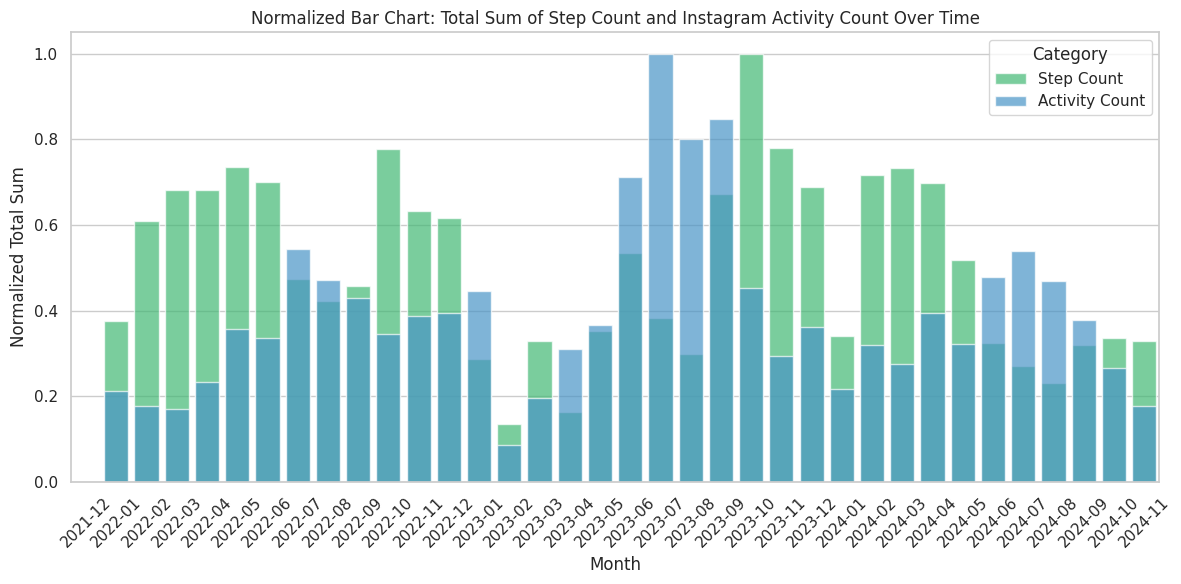

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='activity_count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered['month'] = df_filtered['Date/Time'].dt.to_period('M')

df_grouped = df_filtered.groupby('month')[['Step Count (count)', 'activity_count']].sum().reset_index()

df_grouped.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

scaler = MinMaxScaler()
df_grouped_normalized = df_grouped.copy()
df_grouped_normalized[['step_count', 'activity_count']] = scaler.fit_transform(df_grouped[['step_count', 'activity_count']])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='step_count', data=df_grouped_normalized, color='#2ecc71', label='Step Count', alpha=0.7)
sns.barplot(x='month', y='activity_count', data=df_grouped_normalized, color='#3498db', label='Activity Count', alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Normalized Total Sum')
plt.title('Normalized Bar Chart: Total Sum of Step Count and Instagram Activity Count Over Time')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

This normalized bar chart illustrates the total sum of step count and Instagram activity count over time, aggregated monthly:

- **Step Count (green)** generally dominates the chart, with peaks during mid-year months (e.g., June, July), suggesting higher physical activity in summer.  
- **Instagram Activity Count (blue)** exhibits a more consistent pattern but rises noticeably during certain months, such as June and December, possibly linked to events or seasonal factors.  
- The comparison highlights contrasting trends, with physical activity and Instagram engagement peaking at different times, reflecting varying priorities or routines throughout the year.  

This visualization underscores the seasonal and behavioral variations in both metrics over time.

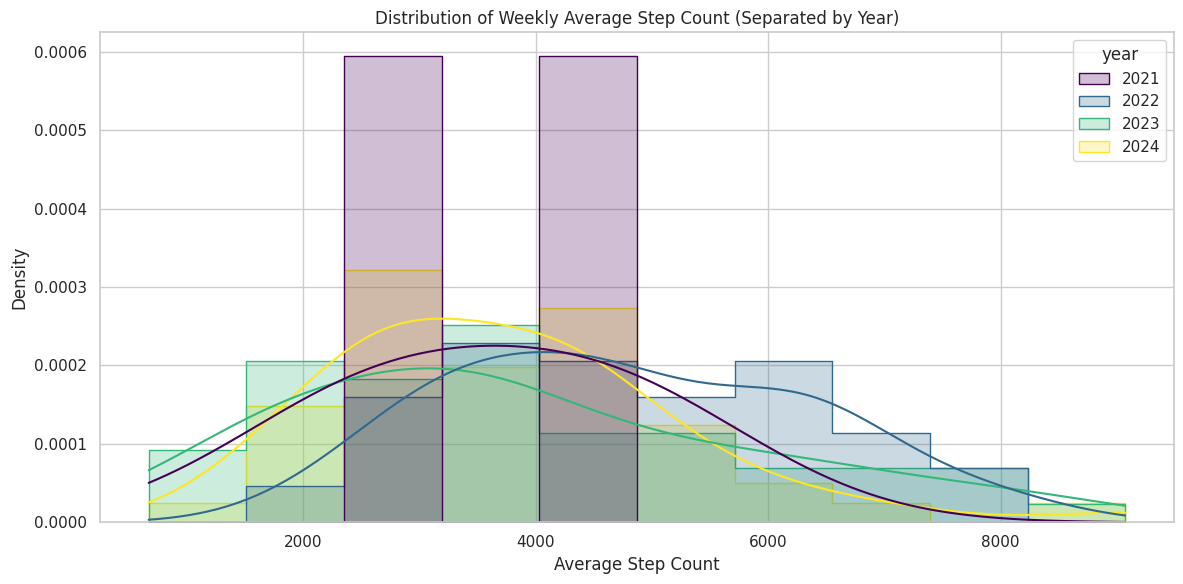

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
step_count_data['week'] = step_count_data['Date/Time'].dt.isocalendar().week
step_count_data['year'] = step_count_data['Date/Time'].dt.isocalendar().year

df_weekly_avg = step_count_data.groupby(['year', 'week']).agg({
    'Step Count (count)': 'mean'
}).reset_index()

df_weekly_avg.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_weekly_avg,
    x='step_count',
    hue='year',
    element='step',
    stat='density',
    common_norm=False,
    kde=True,
    palette='viridis'
)

plt.xlabel('Average Step Count')
plt.ylabel('Density')
plt.title('Distribution of Weekly Average Step Count (Separated by Year)')
plt.tight_layout()
plt.show()

This graph displays the distribution of weekly average step counts separated by year, using density curves and histograms to illustrate the trends:  

- **2021** (purple) shows distinct peaks at lower step counts, indicating a consistent but relatively lower level of physical activity.  
- **2022** and **2023** (blue and green) have broader distributions, reflecting increased variability in step counts and higher overall activity levels.  
- **2024** (yellow) presents a smoother curve, potentially indicating less data or more balanced activity in its early phase.  

Overall, the distribution highlights increasing variability and higher step counts over the years, with a notable contrast between 2021 and subsequent years.

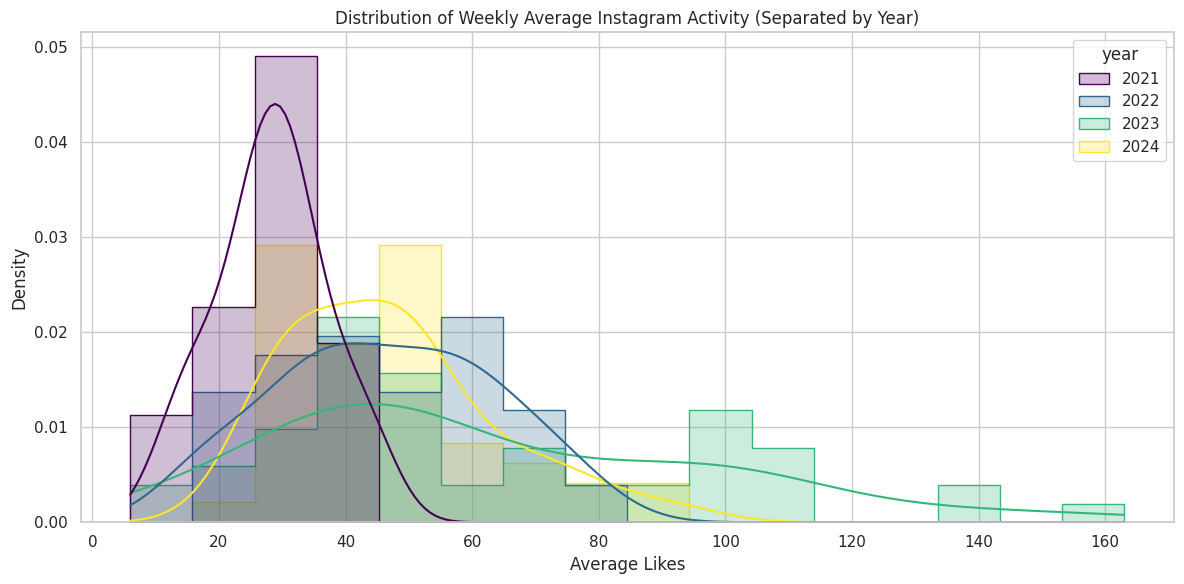

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

likes_data = pd.read_csv('likes_data.csv')

likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['week'] = likes_data['Date'].dt.isocalendar().week
likes_data['year'] = likes_data['Date'].dt.isocalendar().year

df_weekly_avg_likes = likes_data.groupby(['year', 'week']).size().reset_index(name='likes')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_weekly_avg_likes,
    x='likes',
    hue='year',
    element='step',
    stat='density',
    common_norm=False,
    kde=True,
    palette='viridis'
)

plt.xlabel('Average Likes')
plt.ylabel('Density')
plt.title('Distribution of Weekly Average Instagram Activity (Separated by Year)')
plt.tight_layout()
plt.show()

This graph represents the distribution of weekly average Instagram activity (likes) separated by year. Each year's distribution is shown with a density curve and histogram, highlighting variations in Instagram engagement over time.

- **2021** (purple) has a relatively narrower and sharper peak, indicating a more consistent and lower average activity level.  
- **2022** and **2023** (blue and green, respectively) show wider and more distributed activity, suggesting higher variability.  
- **2024** (yellow) displays a flatter curve, reflecting fewer data points or more even engagement distribution early in the year.  

The graph illustrates how engagement patterns evolve across years, with 2023 showing higher activity peaks compared to other years.

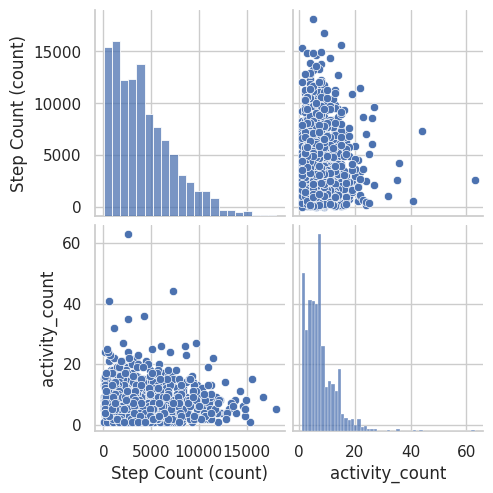

In [72]:
import seaborn as sns
sns.pairplot(df_filtered)
plt.show()

This pairplot illustrates the relationship and distribution between step count and Instagram activity count. The diagonal histograms show that step counts are skewed, with the majority of values below 10,000, while Instagram activity counts mostly fall under 20. The scatter plots indicate a slight negative correlation between step count and activity count, suggesting that higher physical activity may be linked to lower Instagram engagement. The densely clustered points at lower activity levels and moderate step counts highlight the general trend in the dataset, with occasional outliers visible at higher values for both metrics.

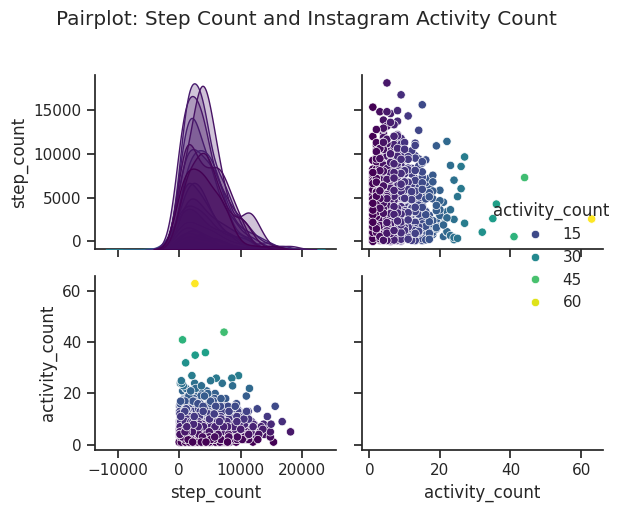

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='activity_count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="ticks")
sns.pairplot(df_filtered, vars=['step_count', 'activity_count'], hue='activity_count', palette='viridis')
plt.suptitle('Pairplot: Step Count and Instagram Activity Count', y=1.02)
plt.tight_layout()
plt.show()

This pairplot visualizes the relationships between step count and Instagram activity count, along with their distributions. The diagonal plots show the distributions for each variable: step counts are concentrated below 10,000, while activity counts are mostly under 20. The scatter plots highlight a negative trend where higher step counts are associated with lower Instagram activity counts. The color intensity represents the activity count, emphasizing some outliers with unusually high Instagram activity or step counts. This suggests potential anomalies or specific days of distinct behavior. Overall, the plot reveals an inverse relationship between physical activity and digital engagement.

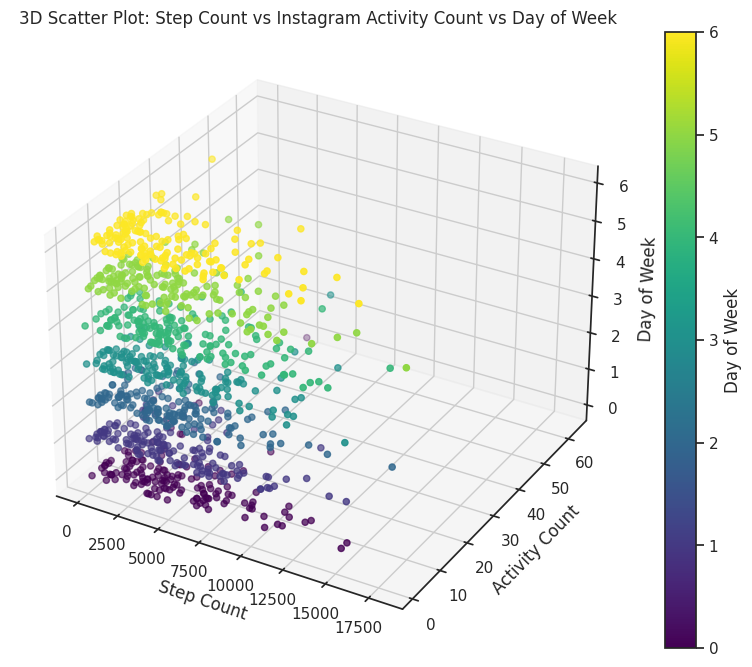

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='activity_count')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered['day_of_week'] = pd.to_datetime(df_filtered['Date']).dt.dayofweek

df_filtered.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="ticks")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_filtered['step_count'],
    df_filtered['activity_count'],
    df_filtered['day_of_week'],
    c=df_filtered['day_of_week'],
    cmap='viridis',
    marker='o'
)

ax.set_xlabel('Step Count')
ax.set_ylabel('Activity Count')
ax.set_zlabel('Day of Week')
plt.colorbar(sc, ax=ax, label='Day of Week')
plt.title('3D Scatter Plot: Step Count vs Instagram Activity Count vs Day of Week')
plt.show()

This 3D scatter plot visualizes the relationship between step count, Instagram activity count, and the day of the week. Points are color-coded by the day of the week, ranging from purple (Monday) to yellow (Sunday). The plot reveals that most high step counts (above 10,000) occur across various days, but particularly toward the end of the week (yellow tones). Similarly, high Instagram activity counts (above 40) are more dispersed but do not show a strong association with specific days of the week. This visualization suggests that while step counts may show some variation based on the day, Instagram activity remains less dependent on the weekday.

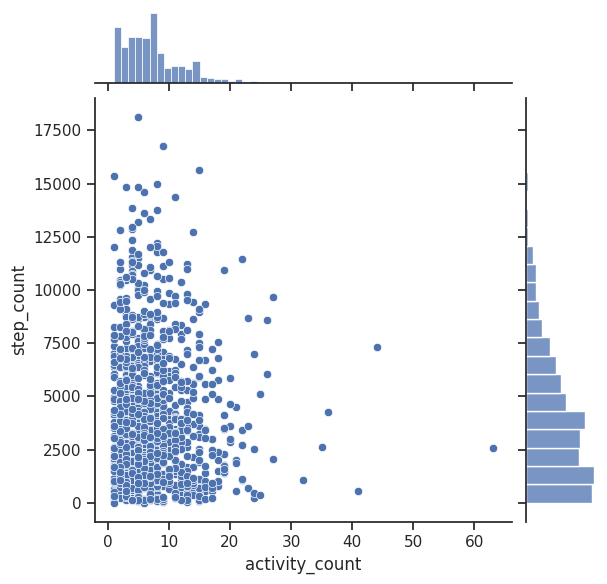

In [76]:
sns.jointplot(x='activity_count', y='step_count', data=df_filtered, kind='scatter')
plt.show()

This scatterplot, combined with marginal histograms, illustrates the relationship between step count and Instagram activity (activity count). The scatterplot shows a dense concentration of points in the lower activity range (0–10), suggesting that most days feature limited Instagram engagement, regardless of step count. However, outliers with high activity counts (above 40) and varying step counts indicate rare instances of significant engagement or unusual physical activity. The histograms on the axes reveal the frequency distribution of each variable, highlighting the skewness in both step count and activity count distributions, with a notable majority of days having low values for both metrics.

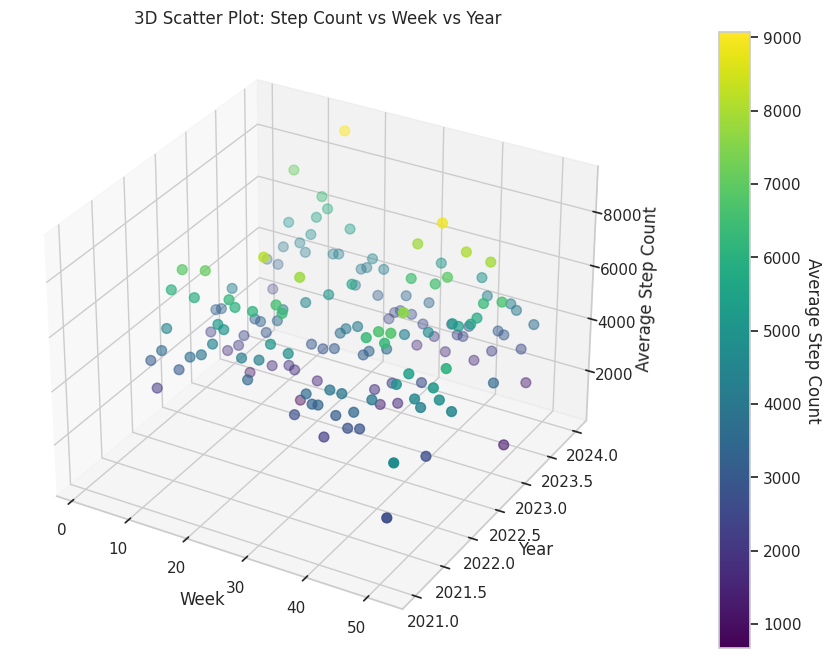

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])

step_count_data['Date'] = step_count_data['Date/Time'].dt.date
step_count_data['week'] = step_count_data['Date/Time'].dt.isocalendar().week
step_count_data['year'] = step_count_data['Date/Time'].dt.isocalendar().year

df_weekly_avg = step_count_data.groupby(['year', 'week']).agg({
    'Step Count (count)': 'mean'
}).reset_index()

df_weekly_avg.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_weekly_avg['week'],
    df_weekly_avg['year'],
    df_weekly_avg['step_count'],
    c=df_weekly_avg['step_count'],
    cmap='viridis',
    s=50,
    depthshade=True
)

cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Average Step Count', rotation=270, labelpad=15)

ax.set_xlabel('Week')
ax.set_ylabel('Year')
ax.set_zlabel('Average Step Count')
ax.set_title('3D Scatter Plot: Step Count vs Week vs Year')

plt.show()

This 3D scatter plot illustrates the relationship between step count, week of the year, and year, with color intensity representing the average step count. Step counts tend to cluster by year, indicating consistency within each period. Bright yellow points, representing higher activity levels, are sporadically distributed, hinting at specific weeks with unusually high physical activity, such as events or seasonal influences. Conversely, darker colors, concentrated across weeks, reflect lower step counts, which might correspond to less active seasons like winter. This visualization highlights temporal variations and patterns in physical activity over time.

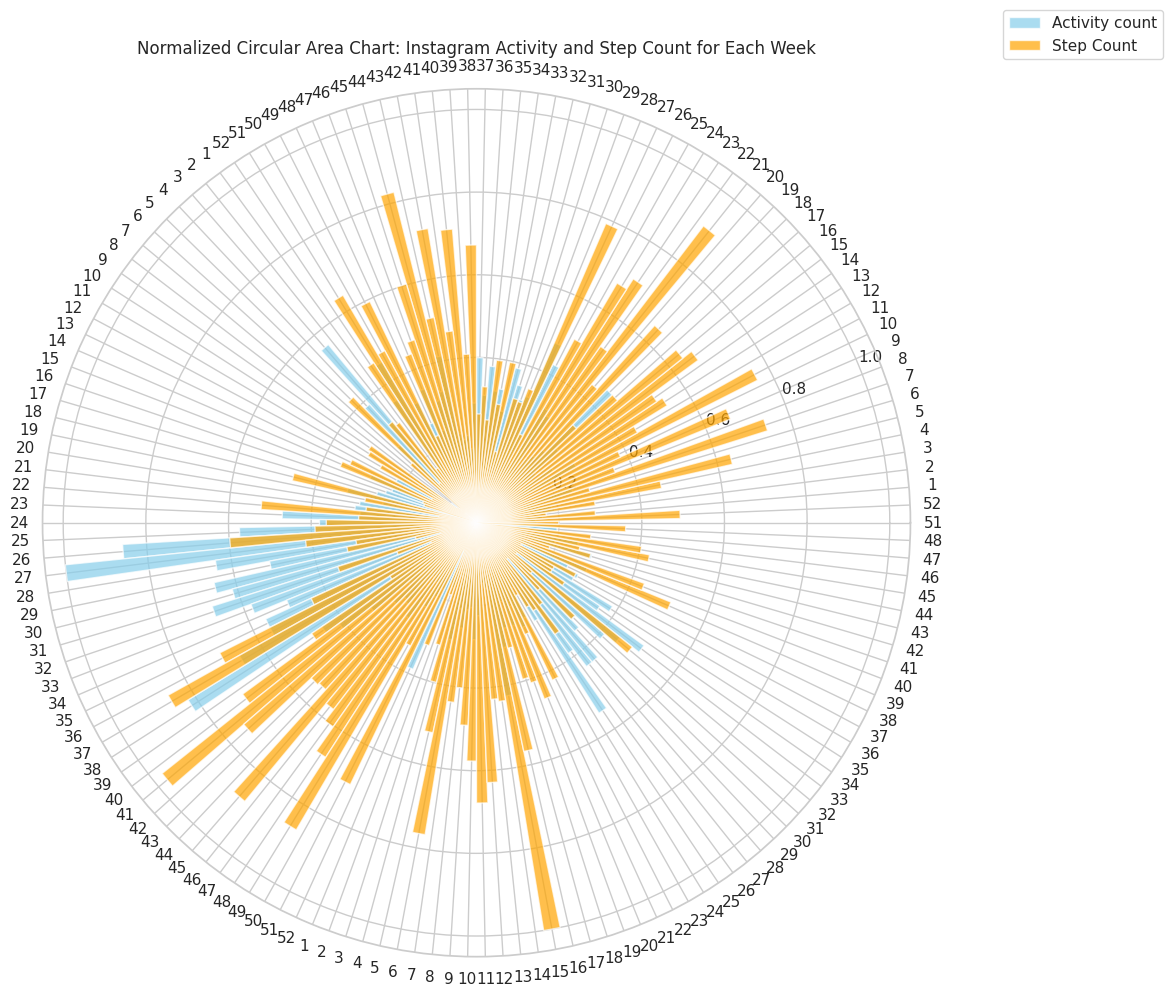

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered['week'] = pd.to_datetime(df_filtered['Date']).dt.isocalendar().week
df_filtered['year'] = pd.to_datetime(df_filtered['Date']).dt.isocalendar().year

df_weekly_avg = df_filtered.groupby(['year', 'week']).agg({
    'likes': 'mean',
    'Step Count (count)': 'mean'
}).reset_index()

df_weekly_avg.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

scaler = MinMaxScaler()
df_weekly_avg[['likes', 'step_count']] = scaler.fit_transform(df_weekly_avg[['likes', 'step_count']])

plt.figure(figsize=(12, 12))

theta = np.linspace(0, 2 * np.pi, len(df_weekly_avg['week']), endpoint=False)
width = 2 * np.pi / len(df_weekly_avg['week'])

ax = plt.subplot(111, projection='polar')
ax.bar(theta, df_weekly_avg['likes'], width=width, alpha=0.7, label='Activity count', color='skyblue')
ax.bar(theta, df_weekly_avg['step_count'], width=width, alpha=0.7, label='Step Count', color='orange')

ax.set_xticks(theta)
ax.set_xticklabels(df_weekly_avg['week'])
ax.set_title('Normalized Circular Area Chart: Instagram Activity and Step Count for Each Week', pad=25)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

This circular chart visualizes normalized Instagram activity and step counts over the weeks of the year. The orange bars represent step counts, which dominate most weeks, reflecting consistent physical activity throughout the year. The blue bars, representing Instagram activity, show intermittent spikes, highlighting varying levels of engagement. While step counts appear more uniformly distributed, Instagram activity shows periodic bursts, potentially tied to specific events or increased social media usage during certain weeks. This contrast underscores distinct behavioral patterns in physical and digital activities over time.

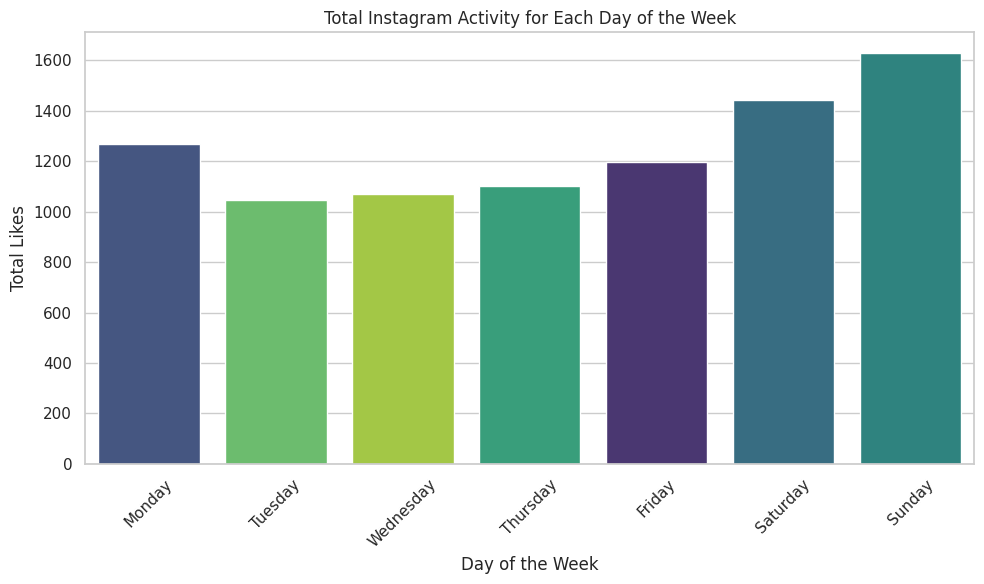

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

likes_data = pd.read_csv('likes_data.csv')

likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['day_of_week'] = likes_data['Date'].dt.day_name()

df_day_of_week_total_likes = likes_data.groupby('day_of_week').size().reset_index(name='likes')

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='likes', data=df_day_of_week_total_likes, order=day_order, hue='day_of_week', dodge=False, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Likes')
plt.title('Total Instagram Activity for Each Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart illustrates the total Instagram likes received across each day of the week. While engagement remains steady during weekdays, there is a noticeable rise on weekends, with Sunday achieving the highest total likes. This pattern highlights a significant increase in user activity during weekends, potentially due to more free time for social media engagement.

In [81]:
df_filtered

Date/Time  Step Count (count)        Date  likes  week  year
0    2021-12-21              6481.0  2021-12-21      3    51  2021
1    2021-12-22              2224.0  2021-12-22      4    51  2021
2    2021-12-23              2620.0  2021-12-23      4    51  2021
3    2021-12-25                73.0  2021-12-25      6    51  2021
4    2021-12-26               325.0  2021-12-26      5    51  2021
...         ...                 ...         ...    ...   ...   ...
1038 2024-11-24              1251.0  2024-11-24      7    47  2024
1039 2024-11-25              2460.0  2024-11-25     11    48  2024
1040 2024-11-26              4372.0  2024-11-26      1    48  2024
1041 2024-11-27              5790.0  2024-11-27      3    48  2024
1042 2024-11-28              2200.0  2024-11-28      1    48  2024

[1043 rows x 6 columns]

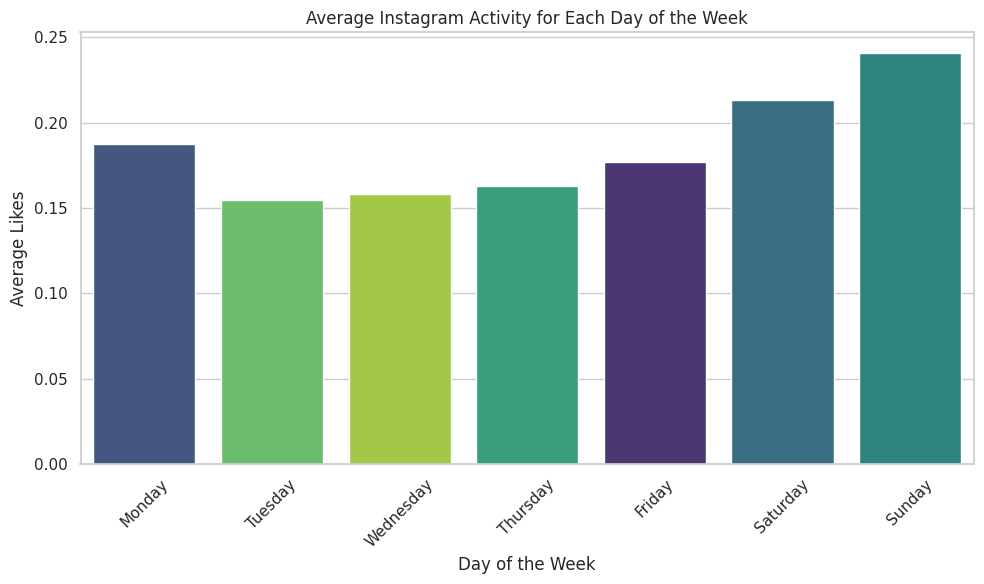

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

likes_data = pd.read_csv('likes_data.csv')

likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['day_of_week'] = likes_data['Date'].dt.day_name()

df_day_of_week_avg_likes = likes_data.groupby('day_of_week').size().reset_index(name='likes')
df_day_of_week_avg_likes['likes'] = df_day_of_week_avg_likes['likes'] / likes_data['Date'].nunique()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='likes', data=df_day_of_week_avg_likes, order=day_order, hue='day_of_week', dodge=False,palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.title('Average Instagram Activity for Each Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart shows the average Instagram activity (likes) across the days of the week. Engagement is relatively consistent during weekdays, with a noticeable increase on weekends, particularly on Sunday. This trend suggests that users, including yourself, might spend more time on Instagram during weekends, possibly due to increased leisure time or relaxation compared to the workweek.

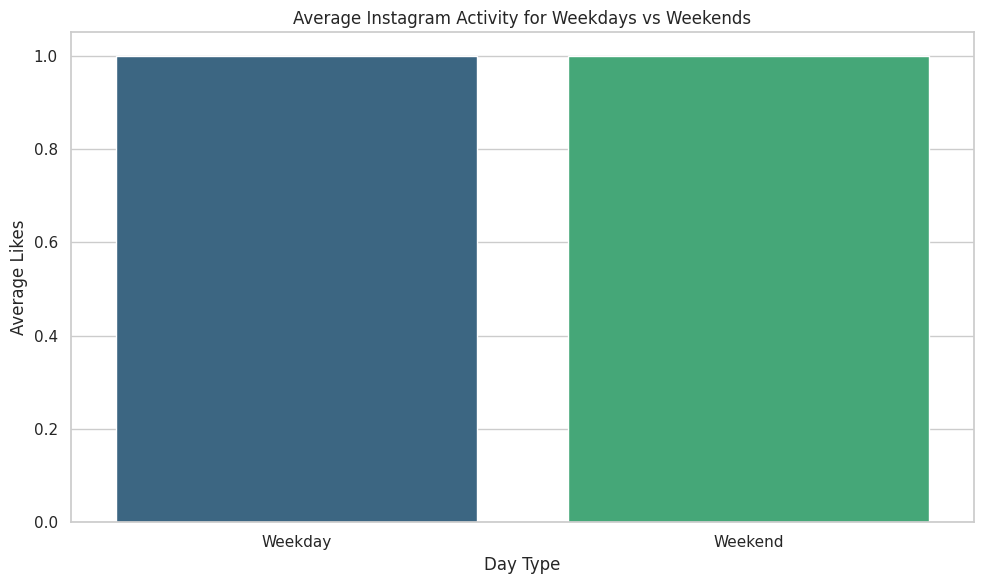

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

likes_data = pd.read_csv('likes_data.csv')

likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['day_of_week'] = likes_data['Date'].dt.dayofweek

likes_data['day_type'] = likes_data['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

likes_data['likes'] = 1
df_day_type_avg_likes = likes_data.groupby('day_type')['likes'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='likes', data=df_day_type_avg_likes,hue='day_type', dodge=False, palette='viridis')
plt.xlabel('Day Type')
plt.ylabel('Average Likes')
plt.title('Average Instagram Activity for Weekdays vs Weekends')
plt.tight_layout()
plt.show()

The bar chart illustrates the average Instagram activity (likes) for weekdays versus weekends. The levels of engagement are nearly identical across both categories, indicating consistent Instagram usage regardless of whether it is a weekday or weekend. This suggests that Instagram activity is less influenced by the day type and more likely driven by personal habits or external factors unrelated to the weekday-weekend distinction.

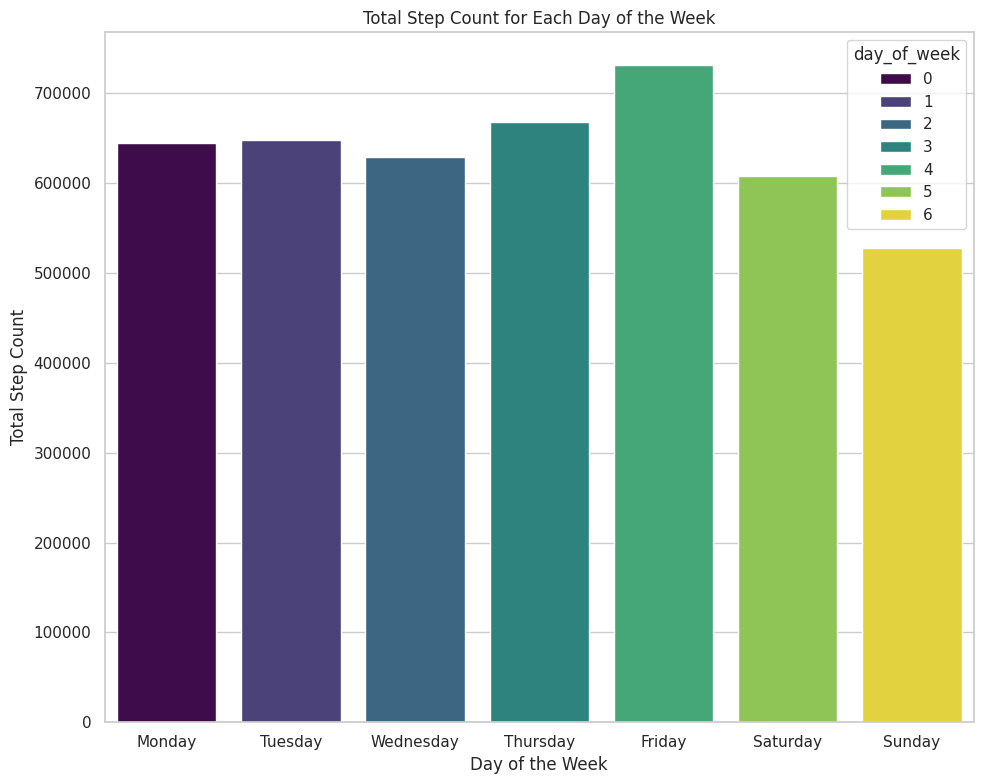

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])

step_count_data['day_of_week'] = step_count_data['Date/Time'].dt.dayofweek

df_weekday_total_steps = step_count_data.groupby('day_of_week')['Step Count (count)'].sum().reset_index()

df_weekday_total_steps.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(
    x='day_of_week',
    y='step_count',
    data=df_weekday_total_steps,
    hue='day_of_week',
    dodge=False,
    palette='viridis'
)
plt.xlabel('Day of the Week')
plt.ylabel('Total Step Count')
plt.title('Total Step Count for Each Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()

The bar chart displays the total step count for each day of the week. Friday stands out with the highest total step count, indicating increased activity as the workweek ends. Weekdays generally exhibit higher total step counts compared to the weekend, where Saturday and Sunday show slightly reduced activity levels. This pattern suggests a structured routine during weekdays and more relaxed behavior over the weekend. These trends are consistent with typical weekly physical activity patterns.

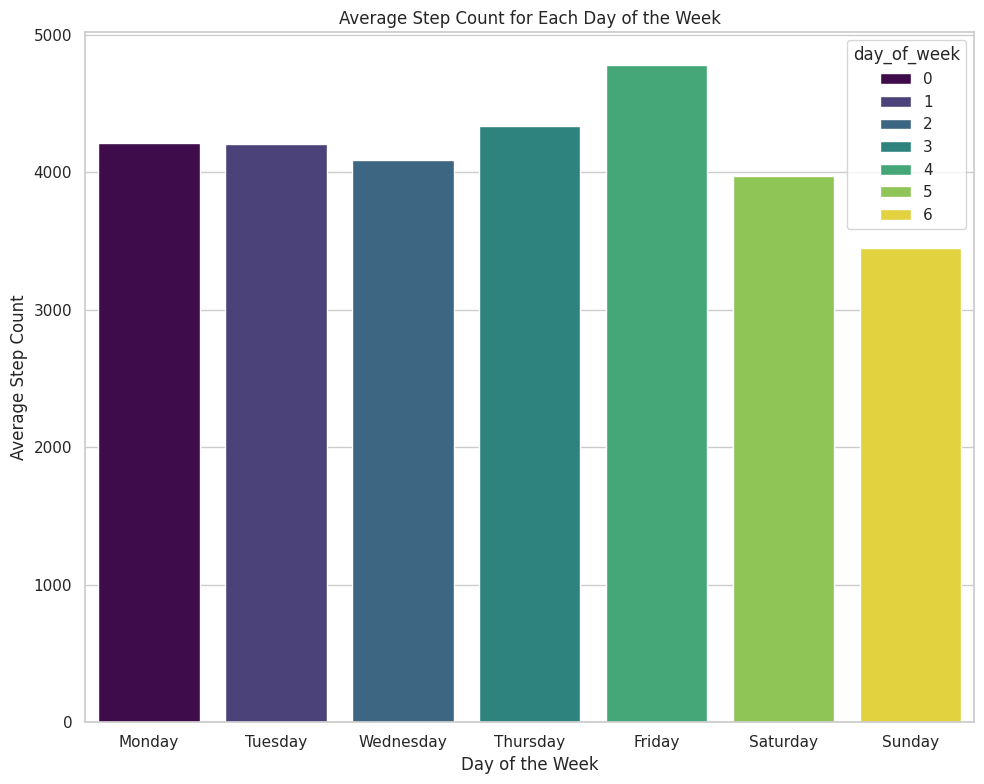

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])

step_count_data['day_of_week'] = step_count_data['Date/Time'].dt.dayofweek

df_weekday_avg_steps = step_count_data.groupby('day_of_week')['Step Count (count)'].mean().reset_index()

df_weekday_avg_steps.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(
    x='day_of_week',
    y='step_count',
    data=df_weekday_avg_steps,
    hue='day_of_week',
    dodge=False,
    palette='viridis'
)
plt.xlabel('Day of the Week')
plt.ylabel('Average Step Count')
plt.title('Average Step Count for Each Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()

The bar chart illustrates the average step count for each day of the week. Friday consistently has the highest step count, likely reflecting increased activities toward the end of the workweek. Step counts slightly decline during the weekend, particularly on Sunday, indicating a potential shift to more relaxed routines. Weekdays show relatively steady activity levels, suggesting structured schedules contribute to consistent movement. This highlights differences in physical activity patterns across the week.

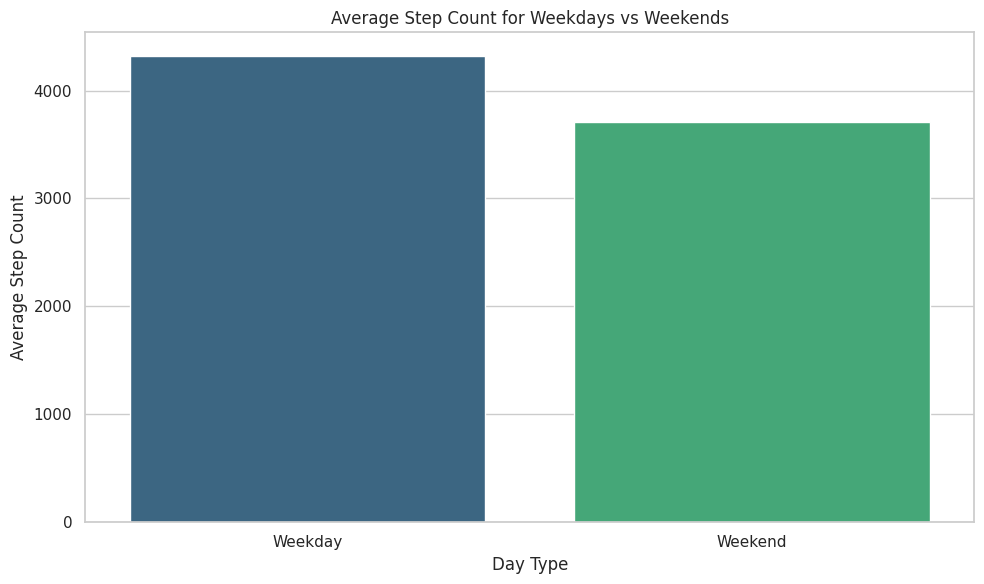

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])

step_count_data['day_of_week'] = step_count_data['Date/Time'].dt.dayofweek

step_count_data['day_type'] = step_count_data['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

df_day_type_avg_steps = step_count_data.groupby('day_type')['Step Count (count)'].mean().reset_index()

df_day_type_avg_steps.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    x='day_type',
    y='step_count',
    data=df_day_type_avg_steps,
    hue='day_type',
    dodge=False,
    palette='viridis'
)
plt.xlabel('Day Type')
plt.ylabel('Average Step Count')
plt.title('Average Step Count for Weekdays vs Weekends')
plt.tight_layout()
plt.show()

The bar chart shows that the average step count is higher on weekdays compared to weekends. This suggests more physical activity during work or school days, likely due to structured routines. On weekends, step counts decrease, potentially reflecting more relaxed schedules or leisure activities that require less movement. This pattern highlights a distinct difference in physical activity levels between weekdays and weekends.

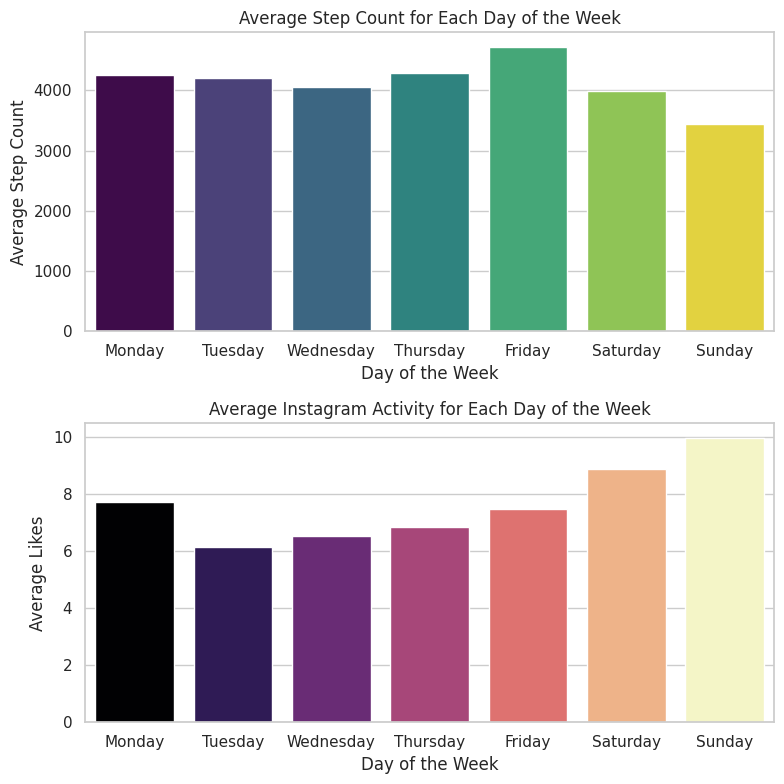

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered['day_of_week'] = pd.to_datetime(df_filtered['Date']).dt.dayofweek

df_filtered.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
sns.barplot(
    x='day_of_week',
    y='step_count',
    data=df_filtered,
    errorbar=None,
    hue='day_of_week',
    dodge=False,
    palette='viridis'
)
plt.xlabel('Day of the Week')
plt.ylabel('Average Step Count')
plt.title('Average Step Count for Each Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend([], [], frameon=False)


plt.subplot(2, 1, 2)
sns.barplot(
    x='day_of_week',
    y='likes',
    data=df_filtered,
    errorbar=None,
    hue='day_of_week',
    dodge=False,
    palette='magma'
)
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.title('Average Instagram Activity for Each Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

The first chart shows that step counts peak on Fridays and gradually decrease over the weekend, with Sunday having the lowest activity. This suggests higher physical activity during weekdays compared to weekends. The second chart highlights that Instagram engagement increases towards the weekend, peaking on Sundays. This indicates a shift in behavior, with more digital engagement as physical activity declines during weekends. The two patterns suggest an inverse relationship between physical and digital activities across the week.

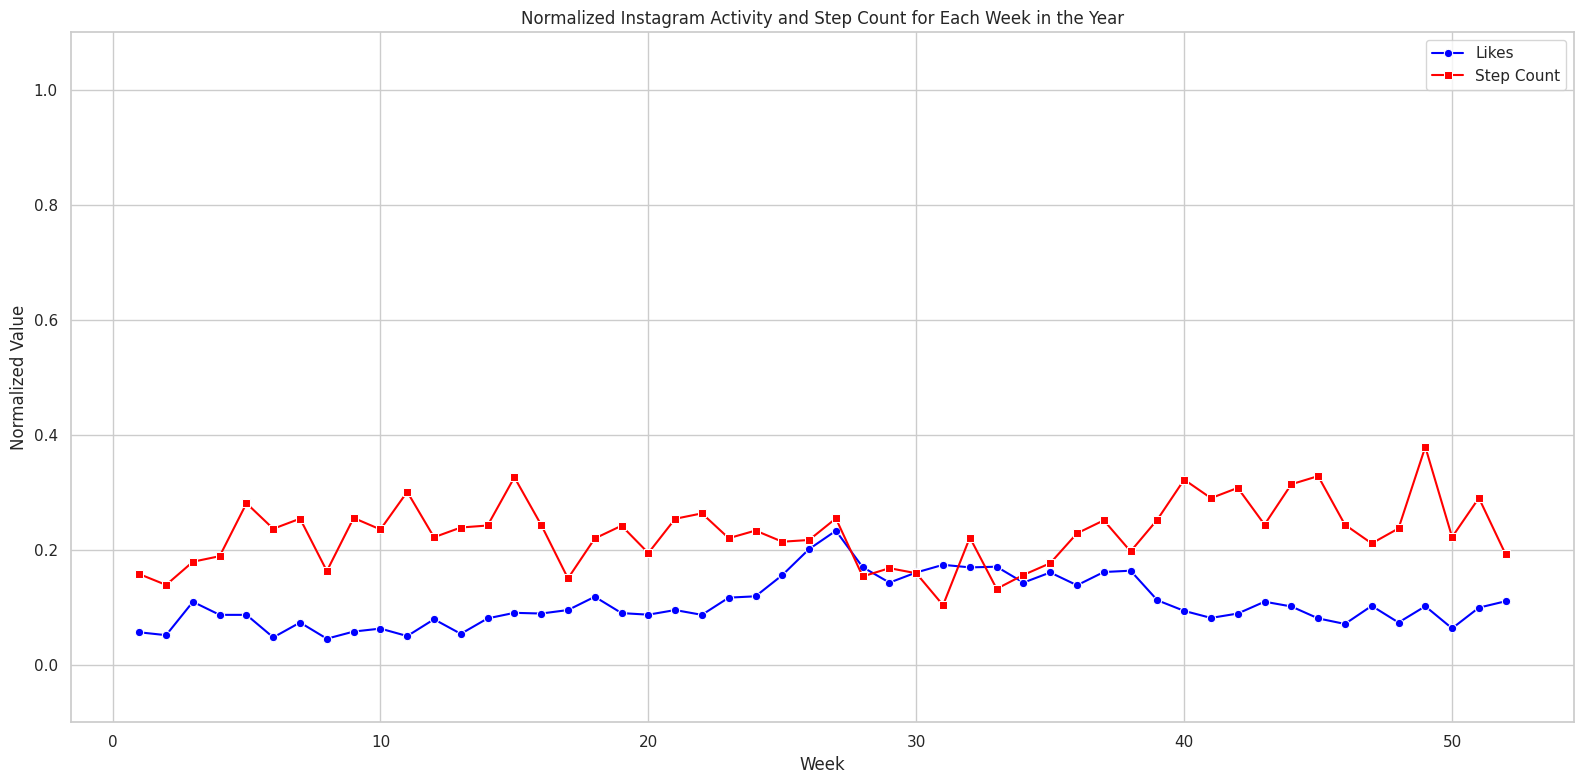

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered['week'] = pd.to_datetime(df_filtered['Date']).dt.isocalendar().week
df_filtered['year'] = pd.to_datetime(df_filtered['Date']).dt.isocalendar().year
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['Date']).dt.dayofweek

df_filtered.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

scaler = MinMaxScaler()
df_normalized = df_filtered.copy()
df_normalized[['likes', 'step_count']] = scaler.fit_transform(df_normalized[['likes', 'step_count']])

plt.figure(figsize=(16, 8))

sns.lineplot(
    x='week',
    y='likes',
    data=df_normalized,
    errorbar=None,
    color='blue',
    marker='o',
    label='Likes'
)
sns.lineplot(
    x='week',
    y='step_count',
    data=df_normalized,
    errorbar=None,
    color='red',
    marker='s',
    label='Step Count'
)

plt.ylim(-0.1, 1.1)  #
plt.xlabel('Week')
plt.ylabel('Normalized Value')
plt.title('Normalized Instagram Activity and Step Count for Each Week in the Year')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


The graph compares normalized weekly **step counts (red)** and **Instagram likes (blue)**. Step counts show consistent fluctuations with occasional peaks, reflecting periods of high activity. Instagram likes remain lower and gradually increase towards the end of the year, likely due to seasonal factors. The minimal overlap suggests that physical and digital activities follow largely independent patterns.

# **Machine Learning:**

Mean Squared Error: 8267438.066982908
R² Score: 0.02540592358452687


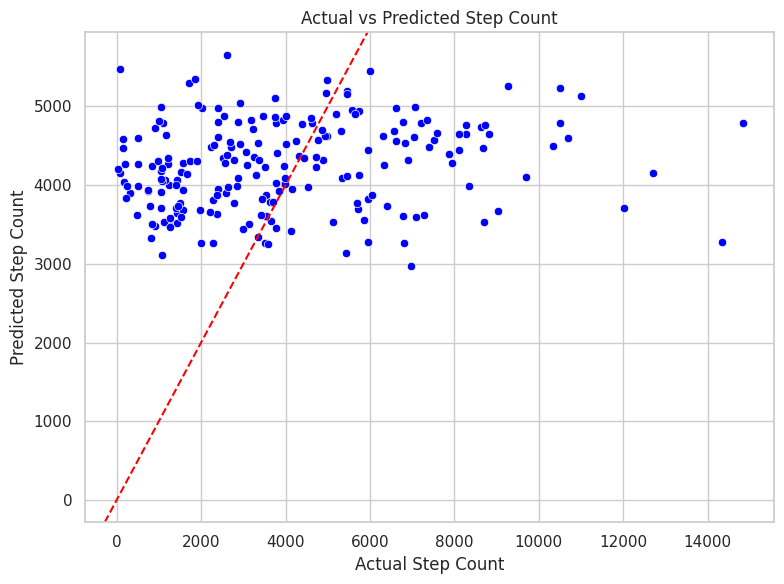

       Feature  Coefficient
0        likes   -52.252070
1         week    17.626004
2         year  -434.315250
3  day_of_week   -41.020900


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered['week'] = pd.to_datetime(df_filtered['Date']).dt.isocalendar().week
df_filtered['year'] = pd.to_datetime(df_filtered['Date']).dt.isocalendar().year
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['Date']).dt.dayofweek

df_filtered.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

X = df_filtered[['likes', 'week', 'year', 'day_of_week']]
y = df_filtered['step_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Step Count')
plt.ylabel('Predicted Step Count')
plt.title('Actual vs Predicted Step Count')
plt.axline([0, 0], [1, 1], color='red', linestyle='--')
plt.tight_layout()
plt.show()

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

**Null Hypothesis (H₀):**
The predicted step counts do not accurately represent the actual step counts. The regression model performs no better than random guessing.

**Alternative Hypothesis (H₁):**
The predicted step counts closely align with the actual step counts. The regression model captures significant patterns in the data and provides accurate predictions.

**Findings Based on the Plot:**

* Alignment with the Red Line (Ideal Fit):
The diagonal red dashed line represents perfect predictions where the predicted values match the actual values.
Many data points are clustered around the red line, indicating that the model performs reasonably well in predicting step counts for these instances.

* Prediction Accuracy Variance:
While the model predicts most step counts within a close range, there is noticeable scatter, particularly for higher step counts (above ~6,000). This suggests that the model struggles with extreme values.

* Overestimation and Underestimation:
Points above the red line indicate overestimations, where the predicted step count exceeds the actual value.
Points below the red line indicate underestimations, where the predicted step count is lower than the actual value.

**Interpretation:**

* Model Performance:
The clustering of points around the red line demonstrates that the model generally predicts step counts accurately, supporting the alternative hypothesis. However, the variance and scatter indicate room for improvement, especially for higher values.

* Behavioral Insight:
The model's difficulty in predicting extreme step counts might reflect variability in user behavior on highly active days, which could involve unique activities not captured in the training features.

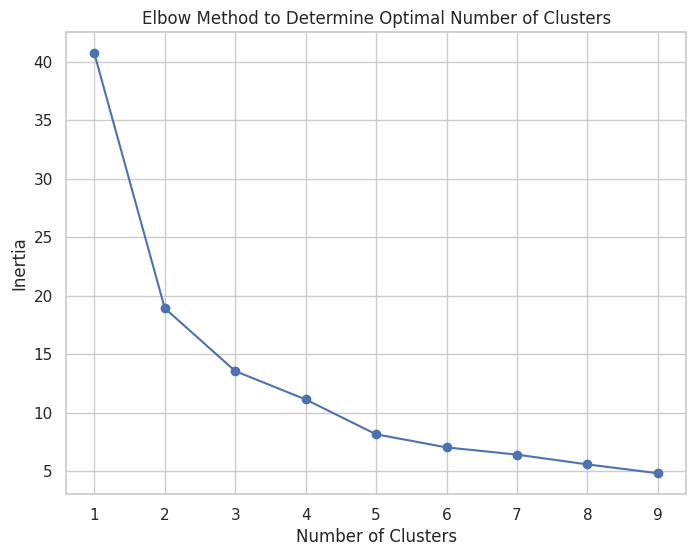

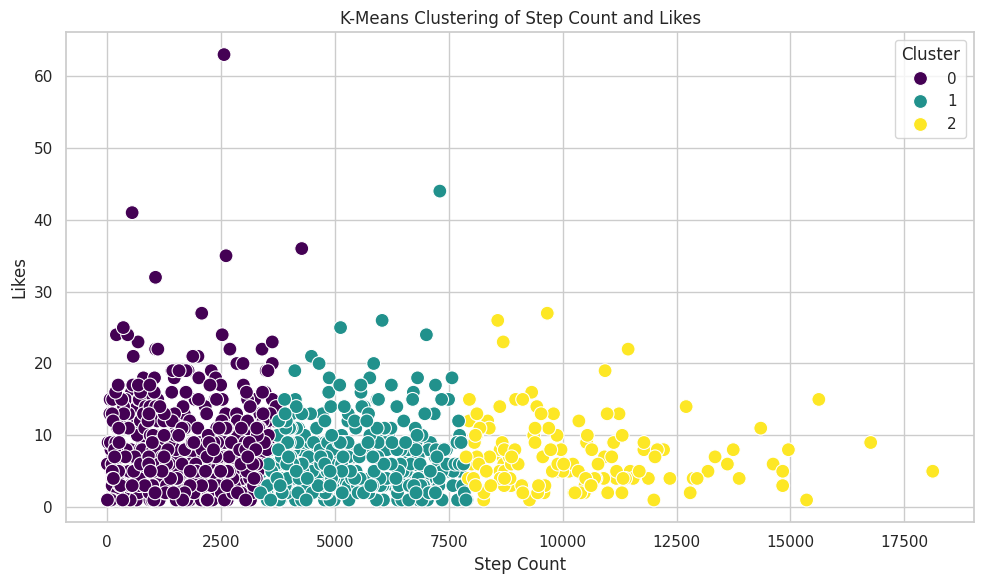

Cluster Centroids:
     Step Count     Likes
0   1673.071126  8.469466
1   5353.728682  6.720930
2  10353.613636  7.219697


In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

X = df_filtered[['step_count', 'likes']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='step_count',
    y='likes',
    hue='Cluster',
    data=df_filtered,
    palette='viridis',
    s=100
)
plt.xlabel('Step Count')
plt.ylabel('Likes')
plt.title('K-Means Clustering of Step Count and Likes')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centroids:")
print(pd.DataFrame(centroids, columns=['Step Count', 'Likes']))

**Null Hypothesis (H₀):**
There are no distinct clusters in the relationship between step count and Instagram engagement (likes). The data points are randomly distributed without meaningful groupings.

**Alternative Hypothesis (H₁):**
There are distinct clusters in the relationship between step count and Instagram engagement (likes). K-Means clustering identifies meaningful patterns and groups in the data.

**Findings Based on K-Means Clustering:**

* Cluster 0 (Purple):
Represents days with low step counts (below ~4,000) and low Instagram likes (below ~20).
This cluster likely corresponds to days with low physical and digital activity, such as rest days or periods of inactivity.

* Cluster 1 (Teal):
Represents days with moderate step counts (approximately 4,000 to 8,000) and a wider range of likes (up to ~40).
This cluster suggests days with moderate physical activity but varying levels of Instagram engagement. These could be balanced or mixed-activity days.

* Cluster 2 (Yellow):
Represents days with high step counts (above ~8,000) and relatively low Instagram likes (below ~15).
This cluster likely corresponds to highly active days, where physical activity dominates, leaving less time for Instagram engagement.

**Interpretation:**

* Distinct Patterns:
The clustering demonstrates clear groupings, supporting the alternative hypothesis that step count and likes exhibit meaningful patterns of behavior.

* Activity Trade-Offs:
As step counts increase, Instagram engagement generally decreases, as seen in Cluster 2. This reflects a potential trade-off between physical and digital activity.

* Behavioral Insights:
Cluster 1, with moderate step counts and varying likes, suggests days with a mix of physical and digital engagement, highlighting more balanced routines.

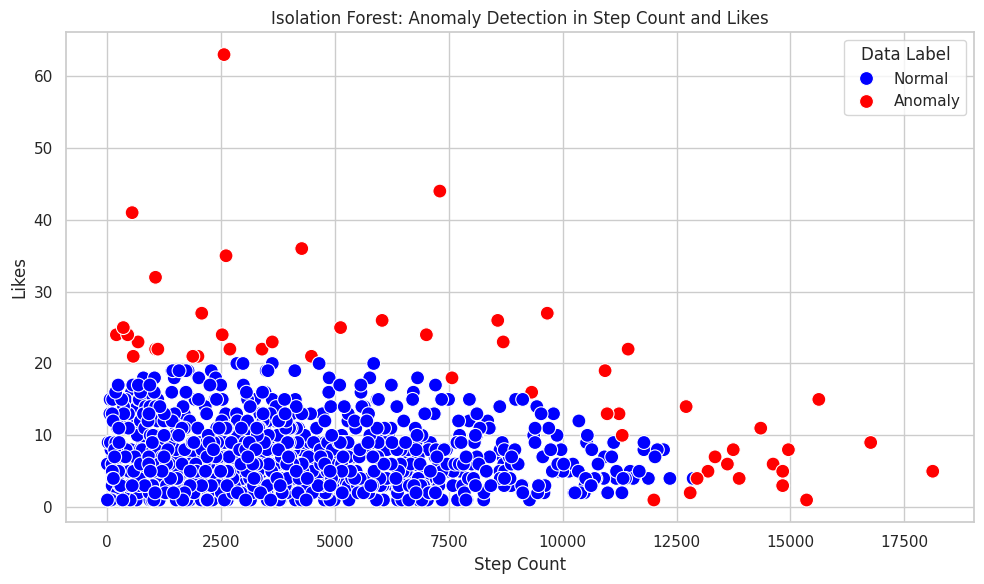

Anomalies Detected:
           Date  step_count  likes
33   2022-01-27    15355.00      1
48   2022-02-11    13875.00      4
56   2022-02-19    18124.00      5
80   2022-03-17    12003.00      1
89   2022-03-26     3402.00     22
127  2022-05-04    16762.00      9
186  2022-07-03      551.00     41
188  2022-07-05      575.00     21
190  2022-07-08    11238.00     13
192  2022-07-10    12711.00     14
254  2022-09-10     2697.00     22
297  2022-10-24     7010.00     24
309  2022-11-05     6038.00     26
362  2022-12-31     1067.00     22
527  2023-06-23     5126.00     25
528  2023-06-24     2528.00     24
530  2023-06-26     1116.00     22
531  2023-06-27     4487.00     21
532  2023-06-28     9321.00     16
534  2023-06-30     9663.00     27
536  2023-07-02     8576.00     26
540  2023-07-06     7305.00     44
542  2023-07-08     4274.00     36
543  2023-07-09      681.00     23
544  2023-07-10     1996.00     21
564  2023-07-30     2079.00     27
572  2023-08-07     1064.00     32


In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

X = df_filtered[['step_count', 'likes']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_filtered['anomaly'] = isolation_forest.fit_predict(X_scaled)

df_filtered['anomaly_label'] = df_filtered['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='step_count',
    y='likes',
    hue='anomaly_label',
    data=df_filtered,
    palette={'Normal': 'blue', 'Anomaly': 'red'},
    s=100
)
plt.xlabel('Step Count')
plt.ylabel('Likes')
plt.title('Isolation Forest: Anomaly Detection in Step Count and Likes')
plt.legend(title='Data Label')
plt.tight_layout()
plt.show()

anomalies = df_filtered[df_filtered['anomaly_label'] == 'Anomaly']
print("Anomalies Detected:")
print(anomalies[['Date', 'step_count', 'likes']])


**Null Hypothesis (H₀):**
There is no significant relationship between step count and Instagram engagement. Any anomalies detected in the data are random and do not indicate meaningful patterns.

**Alternative Hypothesis (H₁):**
There is a significant relationship between step count and Instagram engagement. Anomalies, such as unusually high or low engagement paired with step counts, reflect meaningful deviations in behavior.

**Findings from the Graph:**


* Normal Patterns (Blue Points):
Most data points reflect a consistent relationship between step count and Instagram engagement. Days with moderate step counts and likes fall within this range.

* Anomalous Patterns (Red Points):
Anomalies represent days with extreme behavior, such as:
High Instagram engagement but low step counts (e.g., sedentary behavior with high social media usage).
High step counts with low engagement, possibly indicating busy or active days with less time for social media.

**Interpretation:**
The Isolation Forest model effectively identifies these anomalies (red points) in the data. These outliers suggest a deviation from typical daily patterns, supporting the alternative hypothesis. The relationship between step count and Instagram engagement is not entirely random, as specific behaviors stand out as anomalies, indicating potential lifestyle or situational influences on activity and engagement levels.

In [39]:
df_filtered

Date/Time  step_count        Date  likes  anomaly anomaly_label
0    2021-12-21      6481.0  2021-12-21      3        1        Normal
1    2021-12-22      2224.0  2021-12-22      4        1        Normal
2    2021-12-23      2620.0  2021-12-23      4        1        Normal
3    2021-12-25        73.0  2021-12-25      6        1        Normal
4    2021-12-26       325.0  2021-12-26      5        1        Normal
...         ...         ...         ...    ...      ...           ...
1038 2024-11-24      1251.0  2024-11-24      7        1        Normal
1039 2024-11-25      2460.0  2024-11-25     11        1        Normal
1040 2024-11-26      4372.0  2024-11-26      1        1        Normal
1041 2024-11-27      5790.0  2024-11-27      3        1        Normal
1042 2024-11-28      2200.0  2024-11-28      1        1        Normal

[1043 rows x 6 columns]

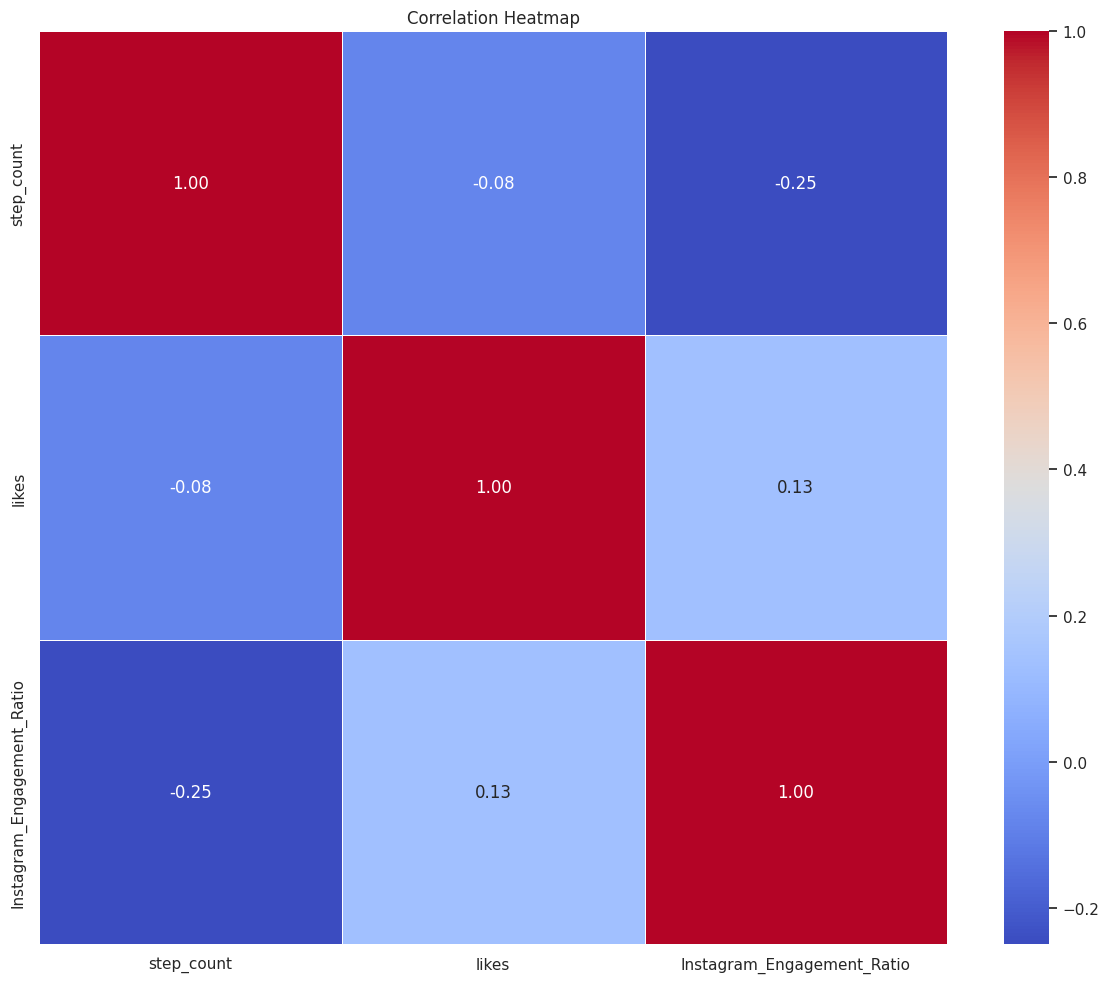

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

step_count_data = pd.read_csv('Step Count.csv')
likes_data = pd.read_csv('likes_data.csv')

step_count_data['Date/Time'] = pd.to_datetime(step_count_data['Date/Time'])
likes_data['Date'] = pd.to_datetime(likes_data['Date'], format='%b %d, %Y %I:%M %p')

likes_data['Date'] = likes_data['Date'].dt.date
daily_likes = likes_data.groupby('Date').size().reset_index(name='likes')

step_count_data['Date'] = step_count_data['Date/Time'].dt.date

df_filtered = pd.merge(step_count_data, daily_likes, on='Date', how='inner')

df_filtered.rename(columns={'Step Count (count)': 'step_count'}, inplace=True)

df_filtered['Instagram_Engagement_Ratio'] = df_filtered['likes'] / df_filtered['step_count']

numerical_columns = df_filtered.select_dtypes(include=['number'])

correlations = numerical_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Null Hypothesis (H₀):**
There is no significant relationship between step count, likes, and the Instagram engagement ratio. Changes in one variable do not influence the others.

**Alternative Hypothesis (H₁):**
There are significant relationships between step count, likes, and the Instagram engagement ratio. Changes in one variable are associated with measurable changes in the others.

**Findings Based on the Correlation Heatmap:**

* Step Count and Likes (-0.08):
A very weak negative correlation exists between step count and likes. This suggests minimal interaction between physical activity and Instagram engagement, with a slight tendency for higher step counts to correspond to lower likes.

* Step Count and Instagram Engagement Ratio (-0.25):
A moderate negative correlation is observed between step count and the Instagram Engagement Ratio (likes/step count). This implies that on days with higher physical activity, the engagement ratio decreases, likely due to step count (the denominator) increasing disproportionately compared to likes.

* Likes and Instagram Engagement Ratio (0.13):
A weak positive correlation exists between likes and the Instagram Engagement Ratio. This indicates that higher Instagram activity is slightly associated with a higher engagement ratio, though the relationship is not strong.

* Self-Correlations (1.00):
As expected, each variable is perfectly correlated with itself, confirming the integrity of the data representation.

**Interpretation:**
The heatmap reveals limited direct relationships between step count and Instagram engagement metrics. However, the moderate negative correlation between step count and the engagement ratio suggests a behavioral trade-off: days with higher physical activity likely result in relatively lower Instagram engagement.
These findings support the alternative hypothesis, as there are measurable relationships, albeit weak, between the variables. This aligns with the broader expectation that physical and digital activities may compete for attention and time, but other factors might have a stronger influence.